In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
from pathlib import Path as Path
plt.style.use("ggplot")
import warnings
warnings.simplefilter("ignore")

In [2]:
Udemy=pd.read_csv('E:\\py\\Data\\with sql\\udemy_courses.csv')
edx_courses=pd.read_csv('E:\\py\\Data\\with sql\\edx_courses.csv')
big_student=pd.read_csv('E:\\py\\Data\\with sql\\big_student_clear_third_version.csv')
google_trands=pd.read_csv('E:\\py\\Data\\with sql\\multiTimeline.csv')

In [3]:
google_trands.head()
google_trands.reset_index(inplace=True)

In [4]:
google_trands.head()

,level_0,level_1,الفئة: جميع الفئات
0,الأسبوع.,edx: (في جميع أنحاء العالم),udemy: (في جميع أنحاء العالم)
1,2017-12-17,11,30
2,2017-12-24,11,31
3,2017-12-31,11,36
4,2018-01-07,13,47


In [5]:
google_trands=google_trands.rename(columns={'level_0':'weeks','level_1':'edx','الفئة: جميع الفئات':'udemy'})
google_trands=google_trands.iloc[1:]
google_trands=google_trands.set_index('weeks')

In [6]:
coruse_trend=google_trands.to_csv('E:\py\Data\with sql\Data\platform_search_trend.csv')

In [7]:
def get_info(data):
    print(data.info(),'\n \n')
    for i in data.columns:
        if data[i].nunique() <= 10:
            print('num of unique values in',i,'\n',data[i].nunique(),'\n values are: \n',data[i].unique(),'\n')
    print('is nulls:\n',data.isnull().sum(),'\n \n')
    print('columns:\n',data.columns,'\n \n')
    print(data.shape,'\n \n')

In [8]:
get_info(edx_courses)
edx_courses.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 975 entries, 0 to 974
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   title               975 non-null    object
 1   summary             922 non-null    object
 2   n_enrolled          855 non-null    object
 3   course_type         975 non-null    object
 4   institution         975 non-null    object
 5   instructors         972 non-null    object
 6   Level               975 non-null    object
 7   subject             975 non-null    object
 8   language            975 non-null    object
 9   subtitles           972 non-null    object
 10  course_effort       975 non-null    object
 11  course_length       975 non-null    object
 12  price               975 non-null    object
 13  course_description  935 non-null    object
 14  course_syllabus     417 non-null    object
 15  course_url          975 non-null    object
dtypes: object(16)
memory usage

,title,summary,n_enrolled,course_type,institution,instructors,Level,subject,language,subtitles,course_effort,course_length,price,course_description,course_syllabus,course_url
0,How to Learn Online,Learn essential strategies for successful onli...,"124,980",Self-paced on your time,edX,Nina Huntemann-Robyn Belair-Ben Piscopo,Introductory,Education & Teacher Training,English,English,2–3 hours per week,2 Weeks,FREE-Add a Verified Certificate for $49 USD,"Designed for those who are new to elearning, t...",Welcome - We start with opportunities to meet ...,https://www.edx.org/course/how-to-learn-online
1,Programming for Everybody (Getting Started wit...,"This course is a ""no prerequisite"" introductio...","293,864",Self-paced on your time,The University of Michigan,Charles Severance,Introductory,Computer Science,English,English,2–4 hours per week,7 Weeks,FREE-Add a Verified Certificate for $49 USD,This course aims to teach everyone the basics ...,NaN,https://www.edx.org/course/programming-for-eve...
2,CS50's Introduction to Computer Science,An introduction to the intellectual enterprise...,"2,442,271",Self-paced on your time,Harvard University,David J. Malan-Doug Lloyd-Brian Yu,Introductory,Computer Science,English,English,6–18 hours per week,12 Weeks,FREE-Add a Verified Certificate for $90 USD,"This is CS50x , Harvard University's introduct...",NaN,https://www.edx.org/course/cs50s-introduction-...
3,The Analytics Edge,"Through inspiring examples and stories, discov...","129,555",Instructor-led on a course schedule,Massachusetts Institute of Technology,Dimitris Bertsimas-Allison O'Hair-John Silberh...,Intermediate,Data Analysis & Statistics,English,English,10–15 hours per week,13 Weeks,FREE-Add a Verified Certificate for $199 USD,"In the last decade, the amount of data availab...",NaN,https://www.edx.org/course/the-analytics-edge
4,Marketing Analytics: Marketing Measurement Str...,This course is part of a MicroMasters® Program,"81,140",Self-paced on your time,"University of California, Berkeley",Stephan Sorger,Introductory,Computer Science,English,English,5–7 hours per week,4 Weeks,FREE-Add a Verified Certificate for $249 USD,Begin your journey in a new career in marketin...,NaN,https://www.edx.org/course/marketing-analytics...


In [9]:
edx_courses.n_enrolled=edx_courses.n_enrolled.str.replace(',','')
edx_courses['price'] = edx_courses['price'].str.replace('FREE-Add a Verified Certificate for', '')
edx_courses['price'] = edx_courses['price'].str.replace('$', '')
edx_courses['price'] = edx_courses['price'].str.replace('USD', '')
edx_courses['course_length']=edx_courses['course_length'].str.replace('Weeks','')

In [10]:
edx_courses.n_enrolled=edx_courses.n_enrolled.fillna(0)
edx_courses=edx_courses.drop('course_syllabus',axis=1)

In [11]:
edx_courses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 975 entries, 0 to 974
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   title               975 non-null    object
 1   summary             922 non-null    object
 2   n_enrolled          975 non-null    object
 3   course_type         975 non-null    object
 4   institution         975 non-null    object
 5   instructors         972 non-null    object
 6   Level               975 non-null    object
 7   subject             975 non-null    object
 8   language            975 non-null    object
 9   subtitles           972 non-null    object
 10  course_effort       975 non-null    object
 11  course_length       975 non-null    object
 12  price               975 non-null    object
 13  course_description  935 non-null    object
 14  course_url          975 non-null    object
dtypes: object(15)
memory usage: 114.4+ KB


In [12]:
edx_courses.price=edx_courses.price.astype('float')
edx_courses.n_enrolled=edx_courses.n_enrolled.astype('int')
edx_courses.language=edx_courses.language.astype('category')
edx_courses.Level=edx_courses.Level.astype('category')
edx_courses.course_type=edx_courses.course_type.astype('category')
edx_courses['course_length']=edx_courses['course_length'].astype('int')

In [13]:
edx_courses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 975 entries, 0 to 974
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   title               975 non-null    object  
 1   summary             922 non-null    object  
 2   n_enrolled          975 non-null    int32   
 3   course_type         975 non-null    category
 4   institution         975 non-null    object  
 5   instructors         972 non-null    object  
 6   Level               975 non-null    category
 7   subject             975 non-null    object  
 8   language            975 non-null    category
 9   subtitles           972 non-null    object  
 10  course_effort       975 non-null    object  
 11  course_length       975 non-null    int32   
 12  price               975 non-null    float64 
 13  course_description  935 non-null    object  
 14  course_url          975 non-null    object  
dtypes: category(3), float64(1), int32(2), ob

In [14]:
edx_courses.isna().sum()

title                  0
summary               53
n_enrolled             0
course_type            0
institution            0
instructors            3
Level                  0
subject                0
language               0
subtitles              3
course_effort          0
course_length          0
price                  0
course_description    40
course_url             0
dtype: int64

In [15]:
edx_courses.summary=edx_courses.summary.fillna('unlisted')
edx_courses.course_description =edx_courses.course_description.fillna('unlisted')
edx_courses.subtitles=edx_courses.subtitles.fillna('English')
edx_courses.instructors =edx_courses.instructors.fillna('Unknown')

In [16]:
edx_courses.tail(3)

,title,summary,n_enrolled,course_type,institution,instructors,Level,subject,language,subtitles,course_effort,course_length,price,course_description,course_url
972,Computational Neuroscience: Neuronal Dynamics ...,This course explains the mathematical and comp...,11246,Self-paced on your time,École polytechnique fédérale de Lausanne,Wulfram Gerstner,Advanced,Biology & Life Sciences,English,English,4–6 hours per week,6,139.0,What happens in your brain when you make a dec...,https://www.edx.org/course/computational-neuro...
973,Cities and the Challenge of Sustainable Develo...,What is a sustainable city? Learn the basics h...,8775,Self-paced on your time,SDG Academy,Jeffrey D. Sachs,Introductory,Environmental Studies,English,English,1–2 hours per week,1,25.0,"According to the United Nations, urbanization ...",https://www.edx.org/course/cities-and-the-chal...
974,MathTrackX: Special Functions,"Understand trigonometric, exponential and loga...",0,Self-paced on your time,University of Adelaide,Dr David Butler,Introductory,Math,English,English,3–6 hours per week,4,79.0,This course is part two of the MathTrackX XSer...,https://www.edx.org/course/mathtrackx-special-...


In [17]:
edx_courses.dtypes

title                   object
summary                 object
n_enrolled               int32
course_type           category
institution             object
instructors             object
Level                 category
subject                 object
language              category
subtitles               object
course_effort           object
course_length            int32
price                  float64
course_description      object
course_url              object
dtype: object

In [18]:
edx_courses

,title,summary,n_enrolled,course_type,institution,instructors,Level,subject,language,subtitles,course_effort,course_length,price,course_description,course_url
0,How to Learn Online,Learn essential strategies for successful onli...,124980,Self-paced on your time,edX,Nina Huntemann-Robyn Belair-Ben Piscopo,Introductory,Education & Teacher Training,English,English,2–3 hours per week,2,49.0,"Designed for those who are new to elearning, t...",https://www.edx.org/course/how-to-learn-online
1,Programming for Everybody (Getting Started wit...,"This course is a ""no prerequisite"" introductio...",293864,Self-paced on your time,The University of Michigan,Charles Severance,Introductory,Computer Science,English,English,2–4 hours per week,7,49.0,This course aims to teach everyone the basics ...,https://www.edx.org/course/programming-for-eve...
2,CS50's Introduction to Computer Science,An introduction to the intellectual enterprise...,2442271,Self-paced on your time,Harvard University,David J. Malan-Doug Lloyd-Brian Yu,Introductory,Computer Science,English,English,6–18 hours per week,12,90.0,"This is CS50x , Harvard University's introduct...",https://www.edx.org/course/cs50s-introduction-...
3,The Analytics Edge,"Through inspiring examples and stories, discov...",129555,Instructor-led on a course schedule,Massachusetts Institute of Technology,Dimitris Bertsimas-Allison O'Hair-John Silberh...,Intermediate,Data Analysis & Statistics,English,English,10–15 hours per week,13,199.0,"In the last decade, the amount of data availab...",https://www.edx.org/course/the-analytics-edge
4,Marketing Analytics: Marketing Measurement Str...,This course is part of a MicroMasters® Program,81140,Self-paced on your time,"University of California, Berkeley",Stephan Sorger,Introductory,Computer Science,English,English,5–7 hours per week,4,249.0,Begin your journey in a new career in marketin...,https://www.edx.org/course/marketing-analytics...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
970,Leaders in Citizen Security and Justice Manage...,"Learn about the latest in prevention, police a...",0,Self-paced on your time,Inter-American Development Bank,Olga Espinoza-Eduardo Pazinato-Alejandra Mera-...,Intermediate,Social Sciences,English,English,4–5 hours per week,10,25.0,The high rates of crime and violence are two o...,https://www.edx.org/course/leaders-in-citizen-...
971,Pattern Studying and Making | 图案审美与创作,Fantastic experiences in beauty and its repres...,0,Self-paced on your time,Tsinghua University,Yuehua Nie,Introductory,Art & Culture,中文,"English, 中文",3–5 hours per week,12,139.0,Are you an original designer? Or a DIY fancier...,https://www.edx.org/course/pattern-studying-an...
972,Computational Neuroscience: Neuronal Dynamics ...,This course explains the mathematical and comp...,11246,Self-paced on your time,École polytechnique fédérale de Lausanne,Wulfram Gerstner,Advanced,Biology & Life Sciences,English,English,4–6 hours per week,6,139.0,What happens in your brain when you make a dec...,https://www.edx.org/course/computational-neuro...
973,Cities and the Challenge of Sustainable Develo...,What is a sustainable city? Learn the basics h...,8775,Self-paced on your time,SDG Academy,Jeffrey D. Sachs,Introductory,Environmental Studies,English,English,1–2 hours per week,1,25.0,"According to the United Nations, urbanization ...",https://www.edx.org/course/cities-and-the-chal...


In [19]:
edx_courses.head()

,title,summary,n_enrolled,course_type,institution,instructors,Level,subject,language,subtitles,course_effort,course_length,price,course_description,course_url
0,How to Learn Online,Learn essential strategies for successful onli...,124980,Self-paced on your time,edX,Nina Huntemann-Robyn Belair-Ben Piscopo,Introductory,Education & Teacher Training,English,English,2–3 hours per week,2,49.0,"Designed for those who are new to elearning, t...",https://www.edx.org/course/how-to-learn-online
1,Programming for Everybody (Getting Started wit...,"This course is a ""no prerequisite"" introductio...",293864,Self-paced on your time,The University of Michigan,Charles Severance,Introductory,Computer Science,English,English,2–4 hours per week,7,49.0,This course aims to teach everyone the basics ...,https://www.edx.org/course/programming-for-eve...
2,CS50's Introduction to Computer Science,An introduction to the intellectual enterprise...,2442271,Self-paced on your time,Harvard University,David J. Malan-Doug Lloyd-Brian Yu,Introductory,Computer Science,English,English,6–18 hours per week,12,90.0,"This is CS50x , Harvard University's introduct...",https://www.edx.org/course/cs50s-introduction-...
3,The Analytics Edge,"Through inspiring examples and stories, discov...",129555,Instructor-led on a course schedule,Massachusetts Institute of Technology,Dimitris Bertsimas-Allison O'Hair-John Silberh...,Intermediate,Data Analysis & Statistics,English,English,10–15 hours per week,13,199.0,"In the last decade, the amount of data availab...",https://www.edx.org/course/the-analytics-edge
4,Marketing Analytics: Marketing Measurement Str...,This course is part of a MicroMasters® Program,81140,Self-paced on your time,"University of California, Berkeley",Stephan Sorger,Introductory,Computer Science,English,English,5–7 hours per week,4,249.0,Begin your journey in a new career in marketin...,https://www.edx.org/course/marketing-analytics...


In [27]:
get_info(Udemy)
Udemy.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   course_id            3678 non-null   int64  
 1   course_title         3678 non-null   object 
 2   url                  3678 non-null   object 
 3   is_paid              3678 non-null   bool   
 4   price                3678 non-null   int64  
 5   num_subscribers      3678 non-null   int64  
 6   num_reviews          3678 non-null   int64  
 7   num_lectures         3678 non-null   int64  
 8   level                3678 non-null   object 
 9   content_duration     3678 non-null   float64
 10  published_timestamp  3678 non-null   object 
 11  subject              3678 non-null   object 
dtypes: bool(1), float64(1), int64(5), object(5)
memory usage: 319.8+ KB
None 
 

num of unique values in is_paid 
 2 
 values are: 
 [ True False] 

num of unique values in level 
 4 
 values 

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance


In [28]:
Udemy.level=Udemy.level.astype('category')
Udemy.published_timestamp=pd.to_datetime(Udemy.published_timestamp)

In [29]:
edx_courses['subject'].unique()

array(['Education & Teacher Training', 'Computer Science',
       'Data Analysis & Statistics', 'Business & Management',
       'Communication', 'Health & Safety', 'Math', 'Humanities', 'Ethics',
       'Economics & Finance', 'Food & Nutrition',
       'Biology & Life Sciences', 'Social Sciences', 'Architecture',
       'Medicine', 'Environmental Studies', 'Chemistry', 'Art & Culture',
       'Language', 'Engineering', 'Philosophy & Ethics', 'Electronics',
       'History', 'Literature', 'Physics', 'Law', 'Design', 'Science',
       'Music', 'Energy & Earth Sciences', 'Philanthropy'], dtype=object)

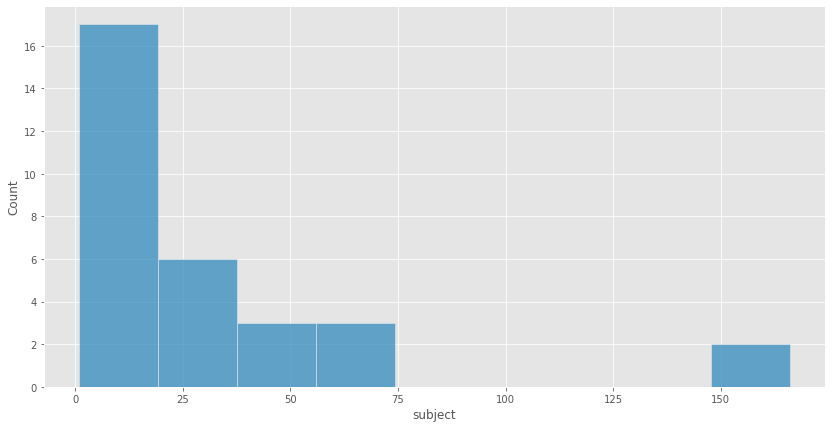

In [30]:
plt.figure(figsize=(14,7))
ax=edx_courses['subject'].value_counts().sort_values()
sns.histplot(ax)
plt.show()

In [31]:
edx_courses_csv=edx_courses.to_csv('E:\py\Data\with sql\Data\edx_courses_cleand.csv')

# concation to  sql

In [32]:
Path('E:\py\Data\with sql\Data\edx_courses_db.db').touch()
edx_conn=sqlite3.connect('E:\py\Data\with sql\Data\edx_courses_db.db')
edx_cursor = edx_conn.cursor()

In [33]:
edx_courses.to_sql('edx_courses_db', edx_conn, if_exists='replace', index=False)

In [34]:
edx_description_init_query = pd.read_sql(''' SELECT * FROM edx_courses_db ''', edx_conn)
edx_description_init_query

,title,summary,n_enrolled,course_type,institution,instructors,Level,subject,language,subtitles,course_effort,course_length,price,course_description,course_url
0,How to Learn Online,Learn essential strategies for successful onli...,124980,Self-paced on your time,edX,Nina Huntemann-Robyn Belair-Ben Piscopo,Introductory,Education & Teacher Training,English,English,2–3 hours per week,2,49.0,"Designed for those who are new to elearning, t...",https://www.edx.org/course/how-to-learn-online
1,Programming for Everybody (Getting Started wit...,"This course is a ""no prerequisite"" introductio...",293864,Self-paced on your time,The University of Michigan,Charles Severance,Introductory,Computer Science,English,English,2–4 hours per week,7,49.0,This course aims to teach everyone the basics ...,https://www.edx.org/course/programming-for-eve...
2,CS50's Introduction to Computer Science,An introduction to the intellectual enterprise...,2442271,Self-paced on your time,Harvard University,David J. Malan-Doug Lloyd-Brian Yu,Introductory,Computer Science,English,English,6–18 hours per week,12,90.0,"This is CS50x , Harvard University's introduct...",https://www.edx.org/course/cs50s-introduction-...
3,The Analytics Edge,"Through inspiring examples and stories, discov...",129555,Instructor-led on a course schedule,Massachusetts Institute of Technology,Dimitris Bertsimas-Allison O'Hair-John Silberh...,Intermediate,Data Analysis & Statistics,English,English,10–15 hours per week,13,199.0,"In the last decade, the amount of data availab...",https://www.edx.org/course/the-analytics-edge
4,Marketing Analytics: Marketing Measurement Str...,This course is part of a MicroMasters® Program,81140,Self-paced on your time,"University of California, Berkeley",Stephan Sorger,Introductory,Computer Science,English,English,5–7 hours per week,4,249.0,Begin your journey in a new career in marketin...,https://www.edx.org/course/marketing-analytics...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
970,Leaders in Citizen Security and Justice Manage...,"Learn about the latest in prevention, police a...",0,Self-paced on your time,Inter-American Development Bank,Olga Espinoza-Eduardo Pazinato-Alejandra Mera-...,Intermediate,Social Sciences,English,English,4–5 hours per week,10,25.0,The high rates of crime and violence are two o...,https://www.edx.org/course/leaders-in-citizen-...
971,Pattern Studying and Making | 图案审美与创作,Fantastic experiences in beauty and its repres...,0,Self-paced on your time,Tsinghua University,Yuehua Nie,Introductory,Art & Culture,中文,"English, 中文",3–5 hours per week,12,139.0,Are you an original designer? Or a DIY fancier...,https://www.edx.org/course/pattern-studying-an...
972,Computational Neuroscience: Neuronal Dynamics ...,This course explains the mathematical and comp...,11246,Self-paced on your time,École polytechnique fédérale de Lausanne,Wulfram Gerstner,Advanced,Biology & Life Sciences,English,English,4–6 hours per week,6,139.0,What happens in your brain when you make a dec...,https://www.edx.org/course/computational-neuro...
973,Cities and the Challenge of Sustainable Develo...,What is a sustainable city? Learn the basics h...,8775,Self-paced on your time,SDG Academy,Jeffrey D. Sachs,Introductory,Environmental Studies,English,English,1–2 hours per week,1,25.0,"According to the United Nations, urbanization ...",https://www.edx.org/course/cities-and-the-chal...


In [35]:
data_analysis_query_highest = pd.read_sql(''' SELECT title, price, course_effort, n_enrolled, institution 
                                      FROM edx_courses_db
                                      WHERE subject == 'Data Analysis & Statistics'
                                      ORDER BY price DESC LIMIT 15 ''', edx_conn)
data_analysis_query_highest

,title,price,course_effort,n_enrolled,institution
0,Python for Data Science,350.0,8–10 hours per week,266978,"The University of California, San Diego"
1,Probability and Statistics in Data Science usi...,350.0,10–12 hours per week,106286,"The University of California, San Diego"
2,Machine Learning Fundamentals,350.0,8–10 hours per week,82008,"The University of California, San Diego"
3,Probability - The Science of Uncertainty and Data,300.0,10–14 hours per week,205615,Massachusetts Institute of Technology
4,Statistics and R,249.0,2–4 hours per week,314586,Harvard University
5,Data Analytics and Visualization in Health Care,249.0,8–10 hours per week,7304,Rochester Institute of Technology
6,The Analytics Edge,199.0,10–15 hours per week,129555,Massachusetts Institute of Technology
7,"Data Science for Construction, Architecture an...",199.0,4–6 hours per week,11113,The National University of Singapore
8,Probability and Statistics I: A Gentle Introd...,199.0,6–10 hours per week,0,The Georgia Institute of Technology
9,Image Processing and Analysis for Life Scientists,199.0,2–3 hours per week,8621,École polytechnique fédérale de Lausanne


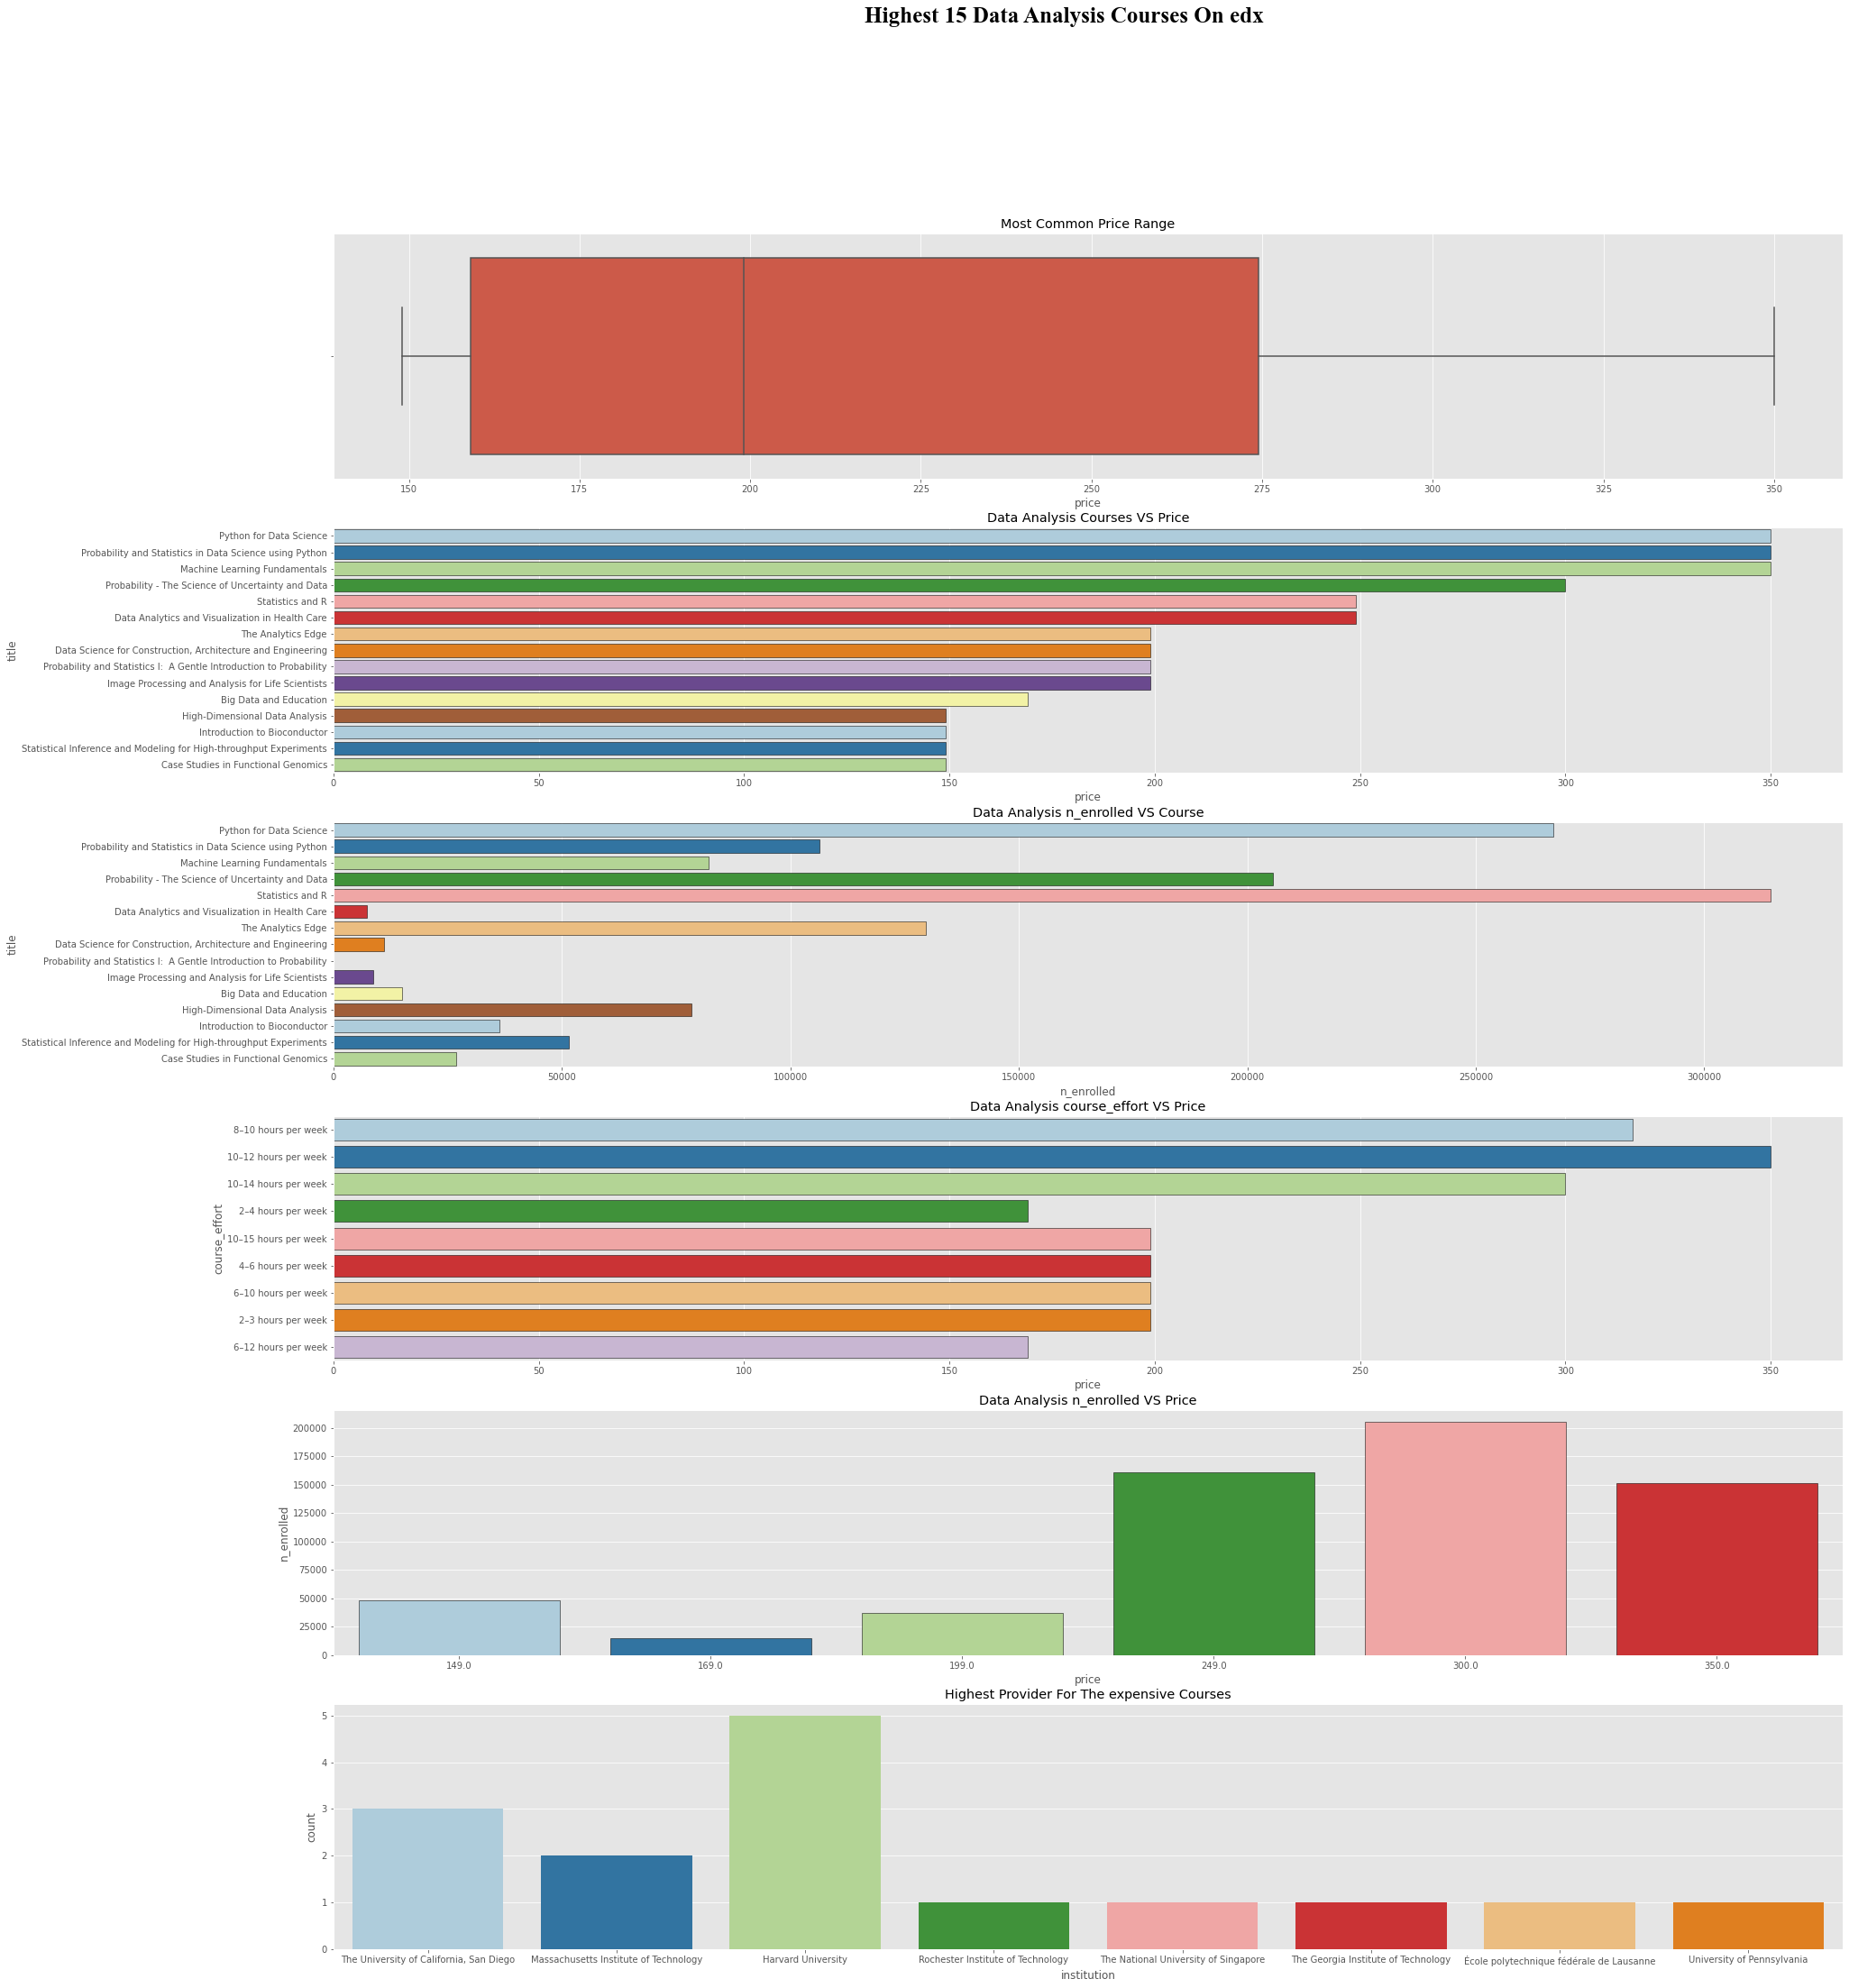

price           227.266667
n_enrolled    89348.533333
dtype: float64


In [36]:
fig, axes = plt.subplots(6,figsize=(30,35))
fig.suptitle("Highest 15 Data Analysis Courses On edx",fontweight='bold',fontname='Times New Roman',size=25)
sns.boxplot(data_analysis_query_highest.price,ax=axes[0])
axes[0].set_title('Most Common Price Range')
sns.barplot(x = 'price', y = 'title', data = data_analysis_query_highest,edgecolor = 'black',palette="Paired",ci=None, ax=axes[1])
axes[1].set_title('Data Analysis Courses VS Price')
sns.barplot(x = 'n_enrolled', y = 'title', data = data_analysis_query_highest,ci=None,edgecolor = 'black',palette="Paired", ax=axes[2])
axes[2].set_title('Data Analysis n_enrolled VS Course')
sns.barplot(x = 'price', y = 'course_effort', data = data_analysis_query_highest,ci=None,edgecolor = 'black',palette="Paired", ax=axes[3])
axes[3].set_title('Data Analysis course_effort VS Price')
sns.barplot(x = 'price', y = 'n_enrolled', data = data_analysis_query_highest,ci=None,edgecolor = 'black',palette="Paired", ax=axes[4])
axes[4].set_title('Data Analysis n_enrolled VS Price')
sns.countplot(data_analysis_query_highest['institution'],palette="Paired",)
axes[5].set_title('Highest Provider For The expensive Courses')
plt.show()
print(data_analysis_query_highest.mean())

In [37]:
data_analysis_query_lowest = pd.read_sql(''' SELECT title, price, course_effort, n_enrolled, institution 
                                      FROM edx_courses_db
                                      WHERE subject == 'Data Analysis & Statistics'
                                      ORDER BY price ASC LIMIT 15 ''', edx_conn)
data_analysis_query_lowest

,title,price,course_effort,n_enrolled,institution
0,Big Data sin misterios,25.0,4–5 hours per week,65564,Inter-American Development Bank
1,Datos para la efectividad de las políticas púb...,25.0,4–5 hours per week,80425,Inter-American Development Bank
2,Measuring Sustainable Development,25.0,1–3 hours per week,0,SDG Academy
3,Compilation Basics for Macroeconomic Statistics,25.0,3–6 hours per week,6570,The International Monetary Fund
4,Python Basics for Data Science,39.0,2–5 hours per week,228809,IBM
5,Machine Learning with Python: A Practical Intr...,39.0,4–6 hours per week,80161,IBM
6,Analyzing Data with Python,39.0,2–4 hours per week,94079,IBM
7,Introduction to Data Science,39.0,3–6 hours per week,43766,IBM
8,SQL for Data Science,39.0,2–4 hours per week,39184,IBM
9,Visualizing Data with Python,39.0,2–4 hours per week,42101,IBM


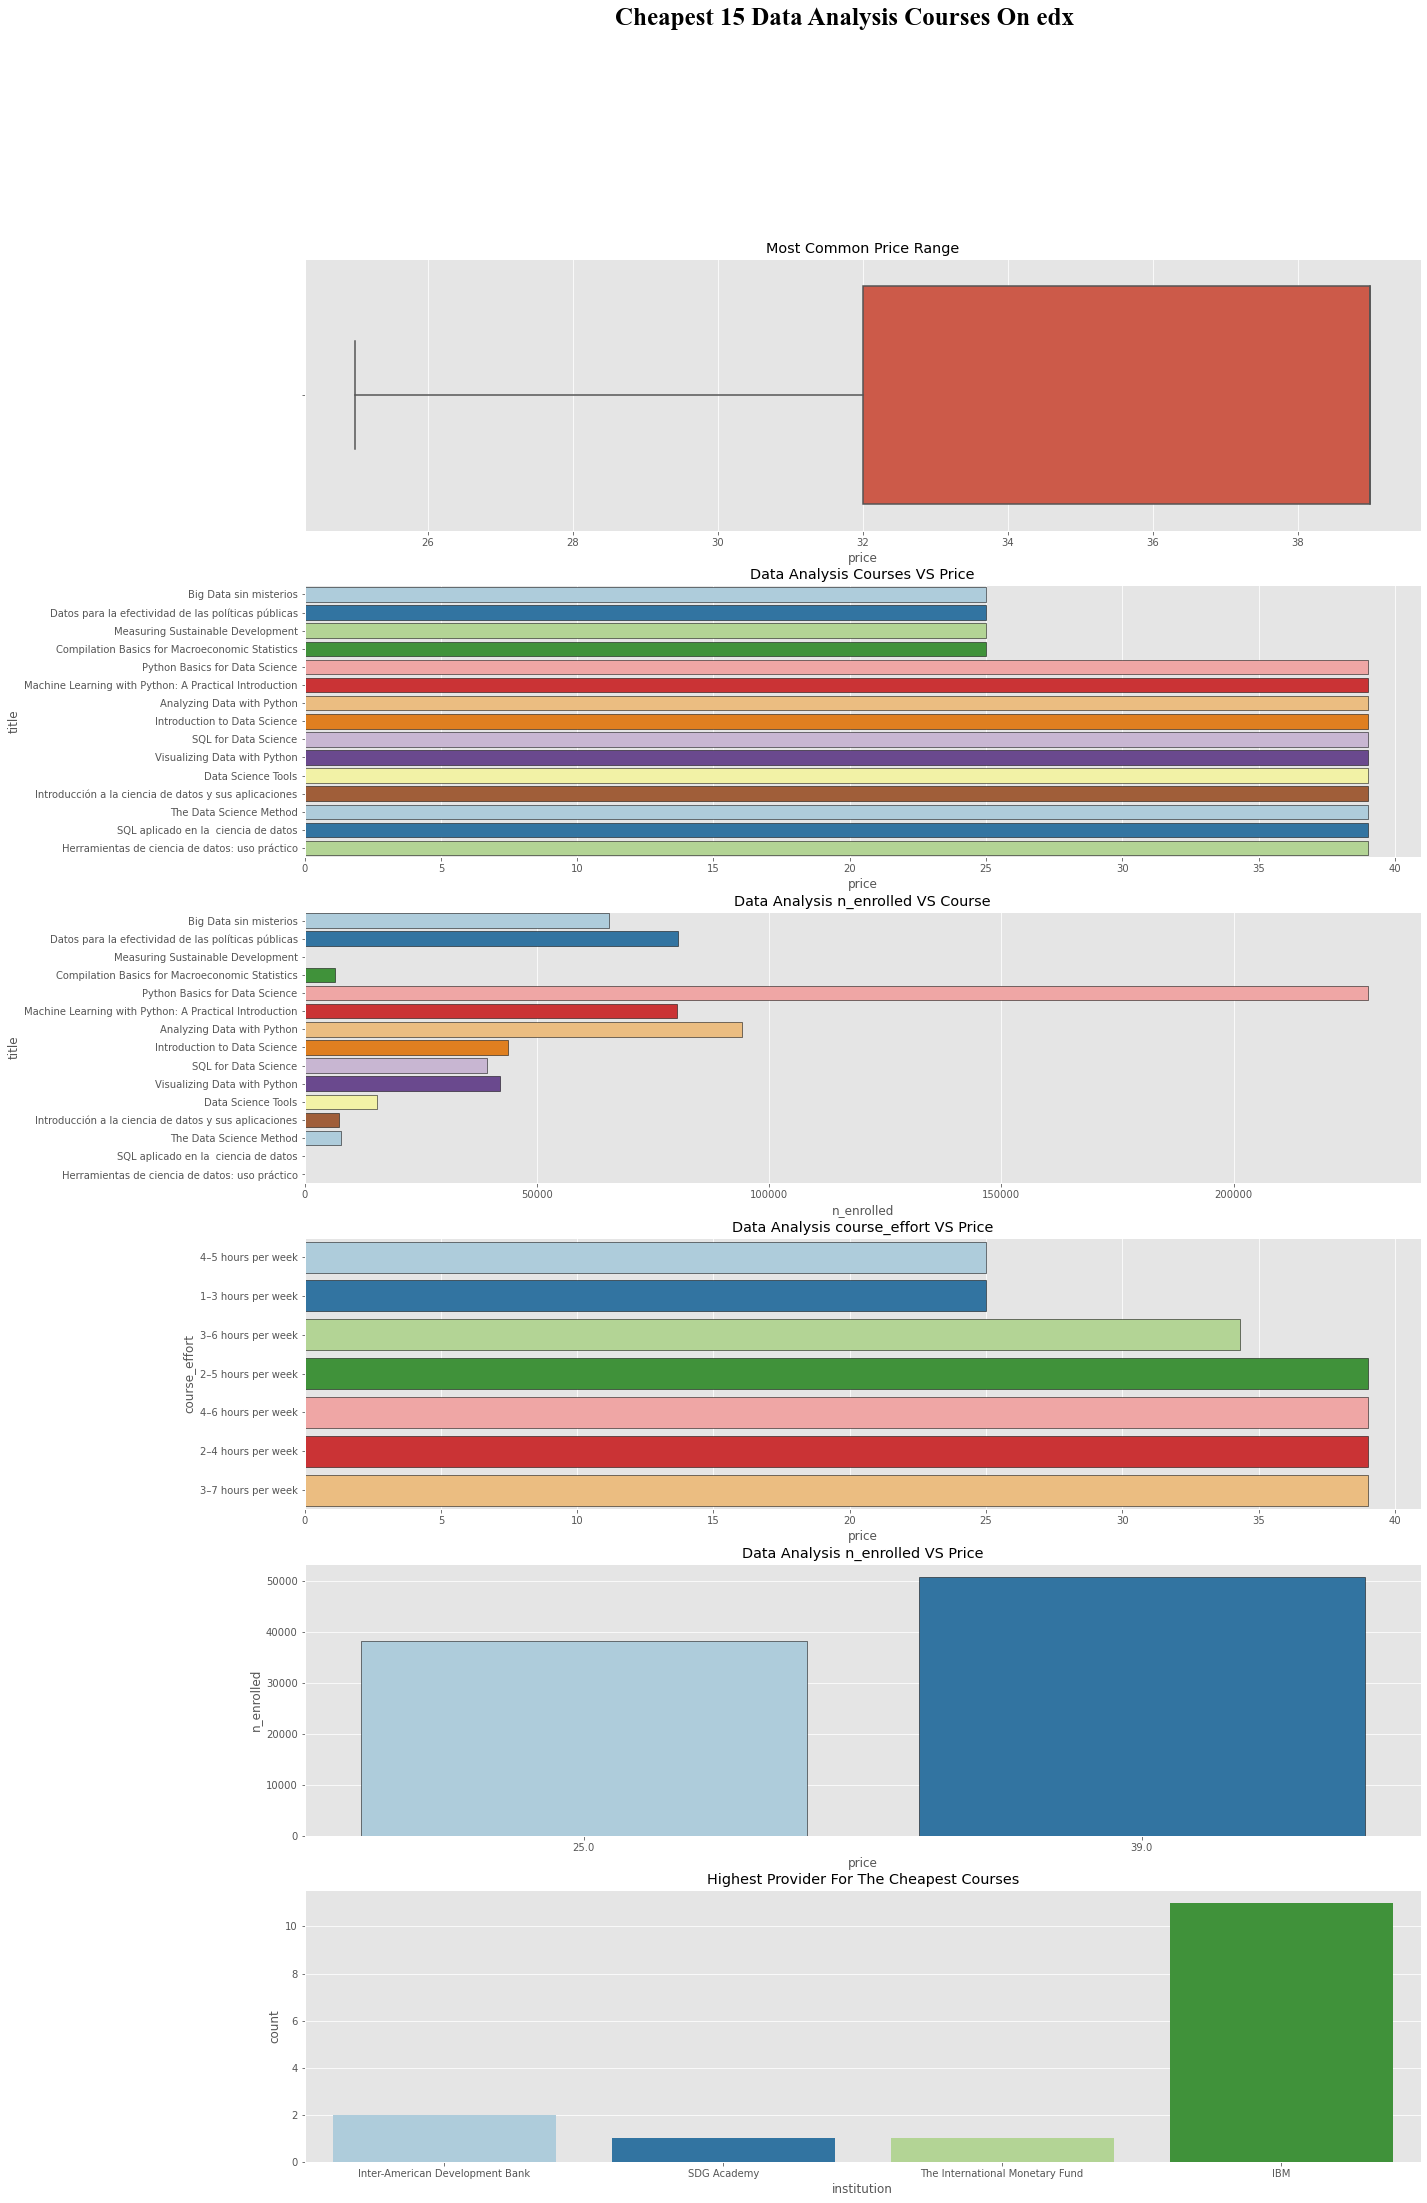

price            35.266667
n_enrolled    47430.466667
dtype: float64


In [38]:
fig, axes = plt.subplots(6,figsize=(20,35))
fig.suptitle("Cheapest 15 Data Analysis Courses On edx",fontweight='bold',fontname='Times New Roman',size=25)
sns.boxplot(data_analysis_query_lowest.price,ax=axes[0])
axes[0].set_title('Most Common Price Range')
sns.barplot(x = 'price', y = 'title', data = data_analysis_query_lowest,ci=None,palette="Paired",edgecolor = 'black', ax=axes[1])
axes[1].set_title('Data Analysis Courses VS Price')
sns.barplot(x = 'n_enrolled', y = 'title', data = data_analysis_query_lowest,palette="Paired",ci=None,edgecolor = 'black', ax=axes[2])
axes[2].set_title('Data Analysis n_enrolled VS Course')
sns.barplot(x = 'price', y = 'course_effort', data = data_analysis_query_lowest,palette="Paired",ci=None,edgecolor = 'black', ax=axes[3])
axes[3].set_title('Data Analysis course_effort VS Price')
sns.barplot(x = 'price', y = 'n_enrolled', data = data_analysis_query_lowest,palette="Paired",ci=None,edgecolor = 'black', ax=axes[4])
axes[4].set_title('Data Analysis n_enrolled VS Price')
sns.countplot(data_analysis_query_lowest['institution'],palette="Paired")
axes[5].set_title('Highest Provider For The Cheapest Courses')

plt.show()
print(data_analysis_query_lowest.mean())

In [39]:
data_analysis_tot=pd.read_sql(''' SELECT SUM(n_enrolled) AS totle_enrollment,COUNT(title) AS num_corses,AVG(course_length) AS avg_weeks_per_course,
MIN(price) AS min_course_purchase,MAX(price) AS max_course_purchase

FROM edx_courses_db 
WHERE subject == 'Data Analysis & Statistics'
''',edx_conn)
data_analysis_tot




,totle_enrollment,num_corses,avg_weeks_per_course,min_course_purchase,max_course_purchase
0,4264412,72,6.125,25.0,350.0


In [40]:
edx_courses.columns

Index(['title', 'summary', 'n_enrolled', 'course_type', 'institution',
       'instructors', 'Level', 'subject', 'language', 'subtitles',
       'course_effort', 'course_length', 'price', 'course_description',
       'course_url'],
      dtype='object')

In [41]:
edx_courses['Level'].value_counts()

Introductory    621
Intermediate    267
Advanced         87
Name: Level, dtype: int64

In [42]:
data_analysis_tot_per_level=pd.read_sql(''' SELECT Level,COUNT(Level) AS tot_corses ,
SUM(n_enrolled) AS totle_enrollment,MIN(price) AS min_course_purchase,MAX(price) AS max_course_purchase,
AVG(course_length) AS avg_weeks_per_course,AVG(price) AS avg_prcie

FROM edx_courses_db 
WHERE subject == 'Data Analysis & Statistics'
GROUP BY Level
''',edx_conn).set_index('Level')

Text(0.5, 1.0, 'enrollment prec for each level')

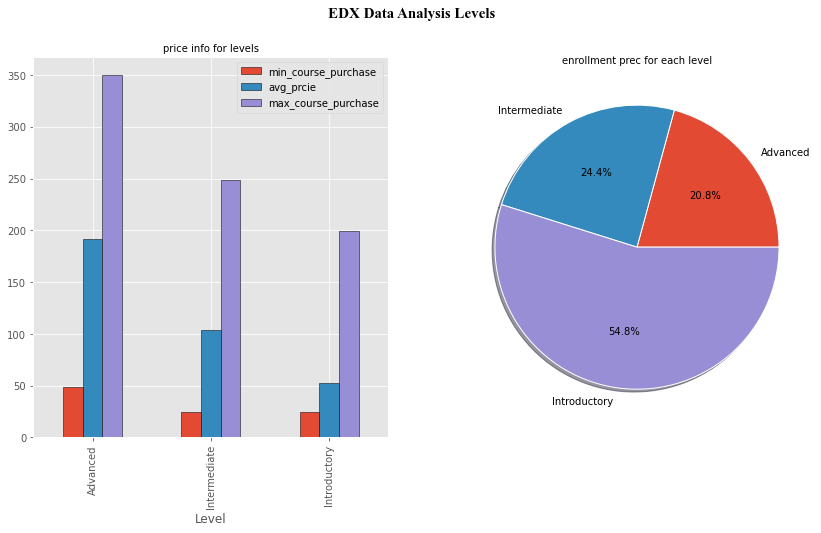

In [43]:
fig,axes=plt.subplots(1,2,figsize=(14,7))
fig.suptitle('EDX Data Analysis Levels',fontweight='bold',fontname='Times New Roman',size=15)
data_analysis_tot_per_level[['min_course_purchase','avg_prcie','max_course_purchase']].plot(kind='bar',edgecolor='black',ax=axes[0])
axes[0].set_title('price info for levels',size=10)
plt.pie(data_analysis_tot_per_level['totle_enrollment'],wedgeprops={ 'linewidth' : 1, 'edgecolor' : "white" },shadow=True,labels=data_analysis_tot_per_level.index,autopct="%1.1f%%")
axes[1].set_title('enrollment prec for each level',size=10)

In [44]:
python = pd.read_sql(''' SELECT title, price, course_effort, n_enrolled, institution,subject
                                       FROM edx_courses_db
                                       WHERE title LIKE '%Python'
                                       ORDER BY price DESC  ''', edx_conn)
python

,title,price,course_effort,n_enrolled,institution,subject
0,Probability and Statistics in Data Science usi...,350.0,10–12 hours per week,106286,"The University of California, San Diego",Data Analysis & Statistics
1,Analytics in Python,249.0,8–10 hours per week,82210,Columbia University,Business & Management
2,CS50's Introduction to Artificial Intelligence...,199.0,10–30 hours per week,258006,Harvard University,Computer Science
3,Data Science: Computational Thinking with Python,199.0,4–6 hours per week,78232,"University of California, Berkeley",Computer Science
4,Estructuras de Datos con Python,49.0,2–4 hours per week,0,The University of Michigan,Computer Science
5,Advanced Algorithmics and Graph Theory with Py...,49.0,2–4 hours per week,13502,IMT,Computer Science
6,Analyzing Data with Python,39.0,2–4 hours per week,94079,IBM,Data Analysis & Statistics
7,Visualizing Data with Python,39.0,2–4 hours per week,42101,IBM,Data Analysis & Statistics


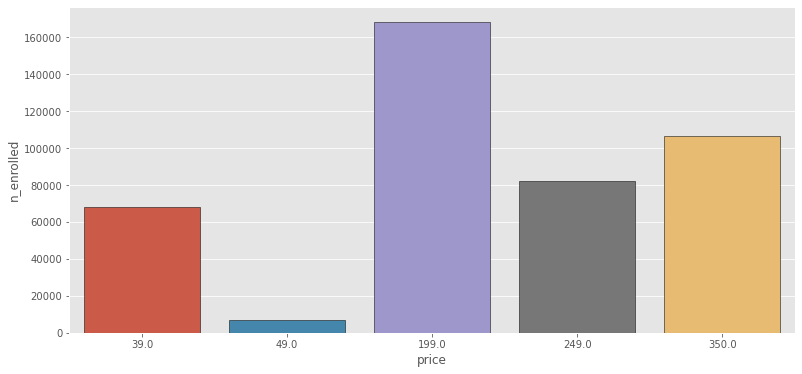

In [45]:
plt.figure(figsize=(13,6))
sns.barplot(x = 'price', y = 'n_enrolled', data = python, edgecolor='black', ci=None)
plt.show()

In [46]:
statistics=pd.read_sql('''SELECT title, price, course_effort, n_enrolled, institution,subject
FROM edx_courses_db
WHERE title LIKE '%Statistics' 
ORDER BY price''',edx_conn)
statistics

,title,price,course_effort,n_enrolled,institution,subject
0,Compilation Basics for Macroeconomic Statistics,25.0,3–6 hours per week,6570,The International Monetary Fund,Data Analysis & Statistics
1,Public Sector Debt Statistics,25.0,6–8 hours per week,0,The International Monetary Fund,Economics & Finance
2,BioStatistics,79.0,5–10 hours per week,14937,Doane University,Biology & Life Sciences
3,MathTrackX: Statistics,79.0,3–6 hours per week,0,University of Adelaide,Math


In [47]:
data_analysis_prob = pd.read_sql(''' SELECT title, price, course_effort, n_enrolled, institution
                                     FROM edx_courses_db
                                     WHERE title LIKE '%Probability' AND title NOT LIKE '%MathTrackX: Probability'
                                     ORDER BY price DESC ''', edx_conn)
data_analysis_prob

,title,price,course_effort,n_enrolled,institution
0,Probability and Statistics I: A Gentle Introd...,199.0,6–10 hours per week,0,The Georgia Institute of Technology
1,Introduction to Probability,99.0,5–10 hours per week,97291,Harvard University
2,Introduction to Probability,99.0,5–10 hours per week,97291,Harvard University
3,Data Science: Probability,49.0,1–2 hours per week,135859,Harvard University


In [48]:
Programming=pd.read_sql(''' SELECT  title, price, course_effort, n_enrolled, institution
                                       FROM edx_courses_db 
                                       WHERE title LIKE '%Programming'
                                       ORDER BY price DESC''',edx_conn)
Programming

,title,price,course_effort,n_enrolled,institution
0,Basics of Computing and Programming,200.0,6–8 hours per week,37045,New York University
1,Object-Oriented Programming,149.0,6–8 hours per week,93633,IITBombay
2,Computing in Python I: Fundamentals and Proced...,99.0,9–10 hours per week,141966,The Georgia Institute of Technology
3,AI Chatbots without Programming,99.0,2–4 hours per week,35440,IBM


In [49]:
comp_sci_query = pd.read_sql(''' SELECT title, price, course_effort, n_enrolled, institution
                                 FROM edx_courses_db WHERE subject == 'Computer Science'
                                 ORDER BY price DESC LIMIT 15 ''', edx_conn)
comp_sci_query

,title,price,course_effort,n_enrolled,institution
0,Information Technology Foundations,399.6,9–10 hours per week,6388,Western Governors University
1,Driving Digital Innovation through Experimenta...,399.0,3–5 hours per week,16904,Boston University
2,Machine Learning with Python: from Linear Mode...,300.0,10–14 hours per week,85561,Massachusetts Institute of Technology
3,Network and Security Foundations,299.7,9–10 hours per week,7301,Western Governors University
4,Scripting and Programming Foundations,299.7,9–10 hours per week,0,Western Governors University
5,Cloud Computing for Enterprises,299.0,8–10 hours per week,27241,University System of Maryland-University of Ma...
6,Marketing Analytics: Marketing Measurement Str...,249.0,5–7 hours per week,81140,"University of California, Berkeley"
7,Marketing Analytics: Competitive Analysis and ...,249.0,5–7 hours per week,70682,"University of California, Berkeley"
8,Artificial Intelligence (AI),249.0,8–10 hours per week,265104,Columbia University
9,Machine Learning,249.0,8–10 hours per week,150855,Columbia University


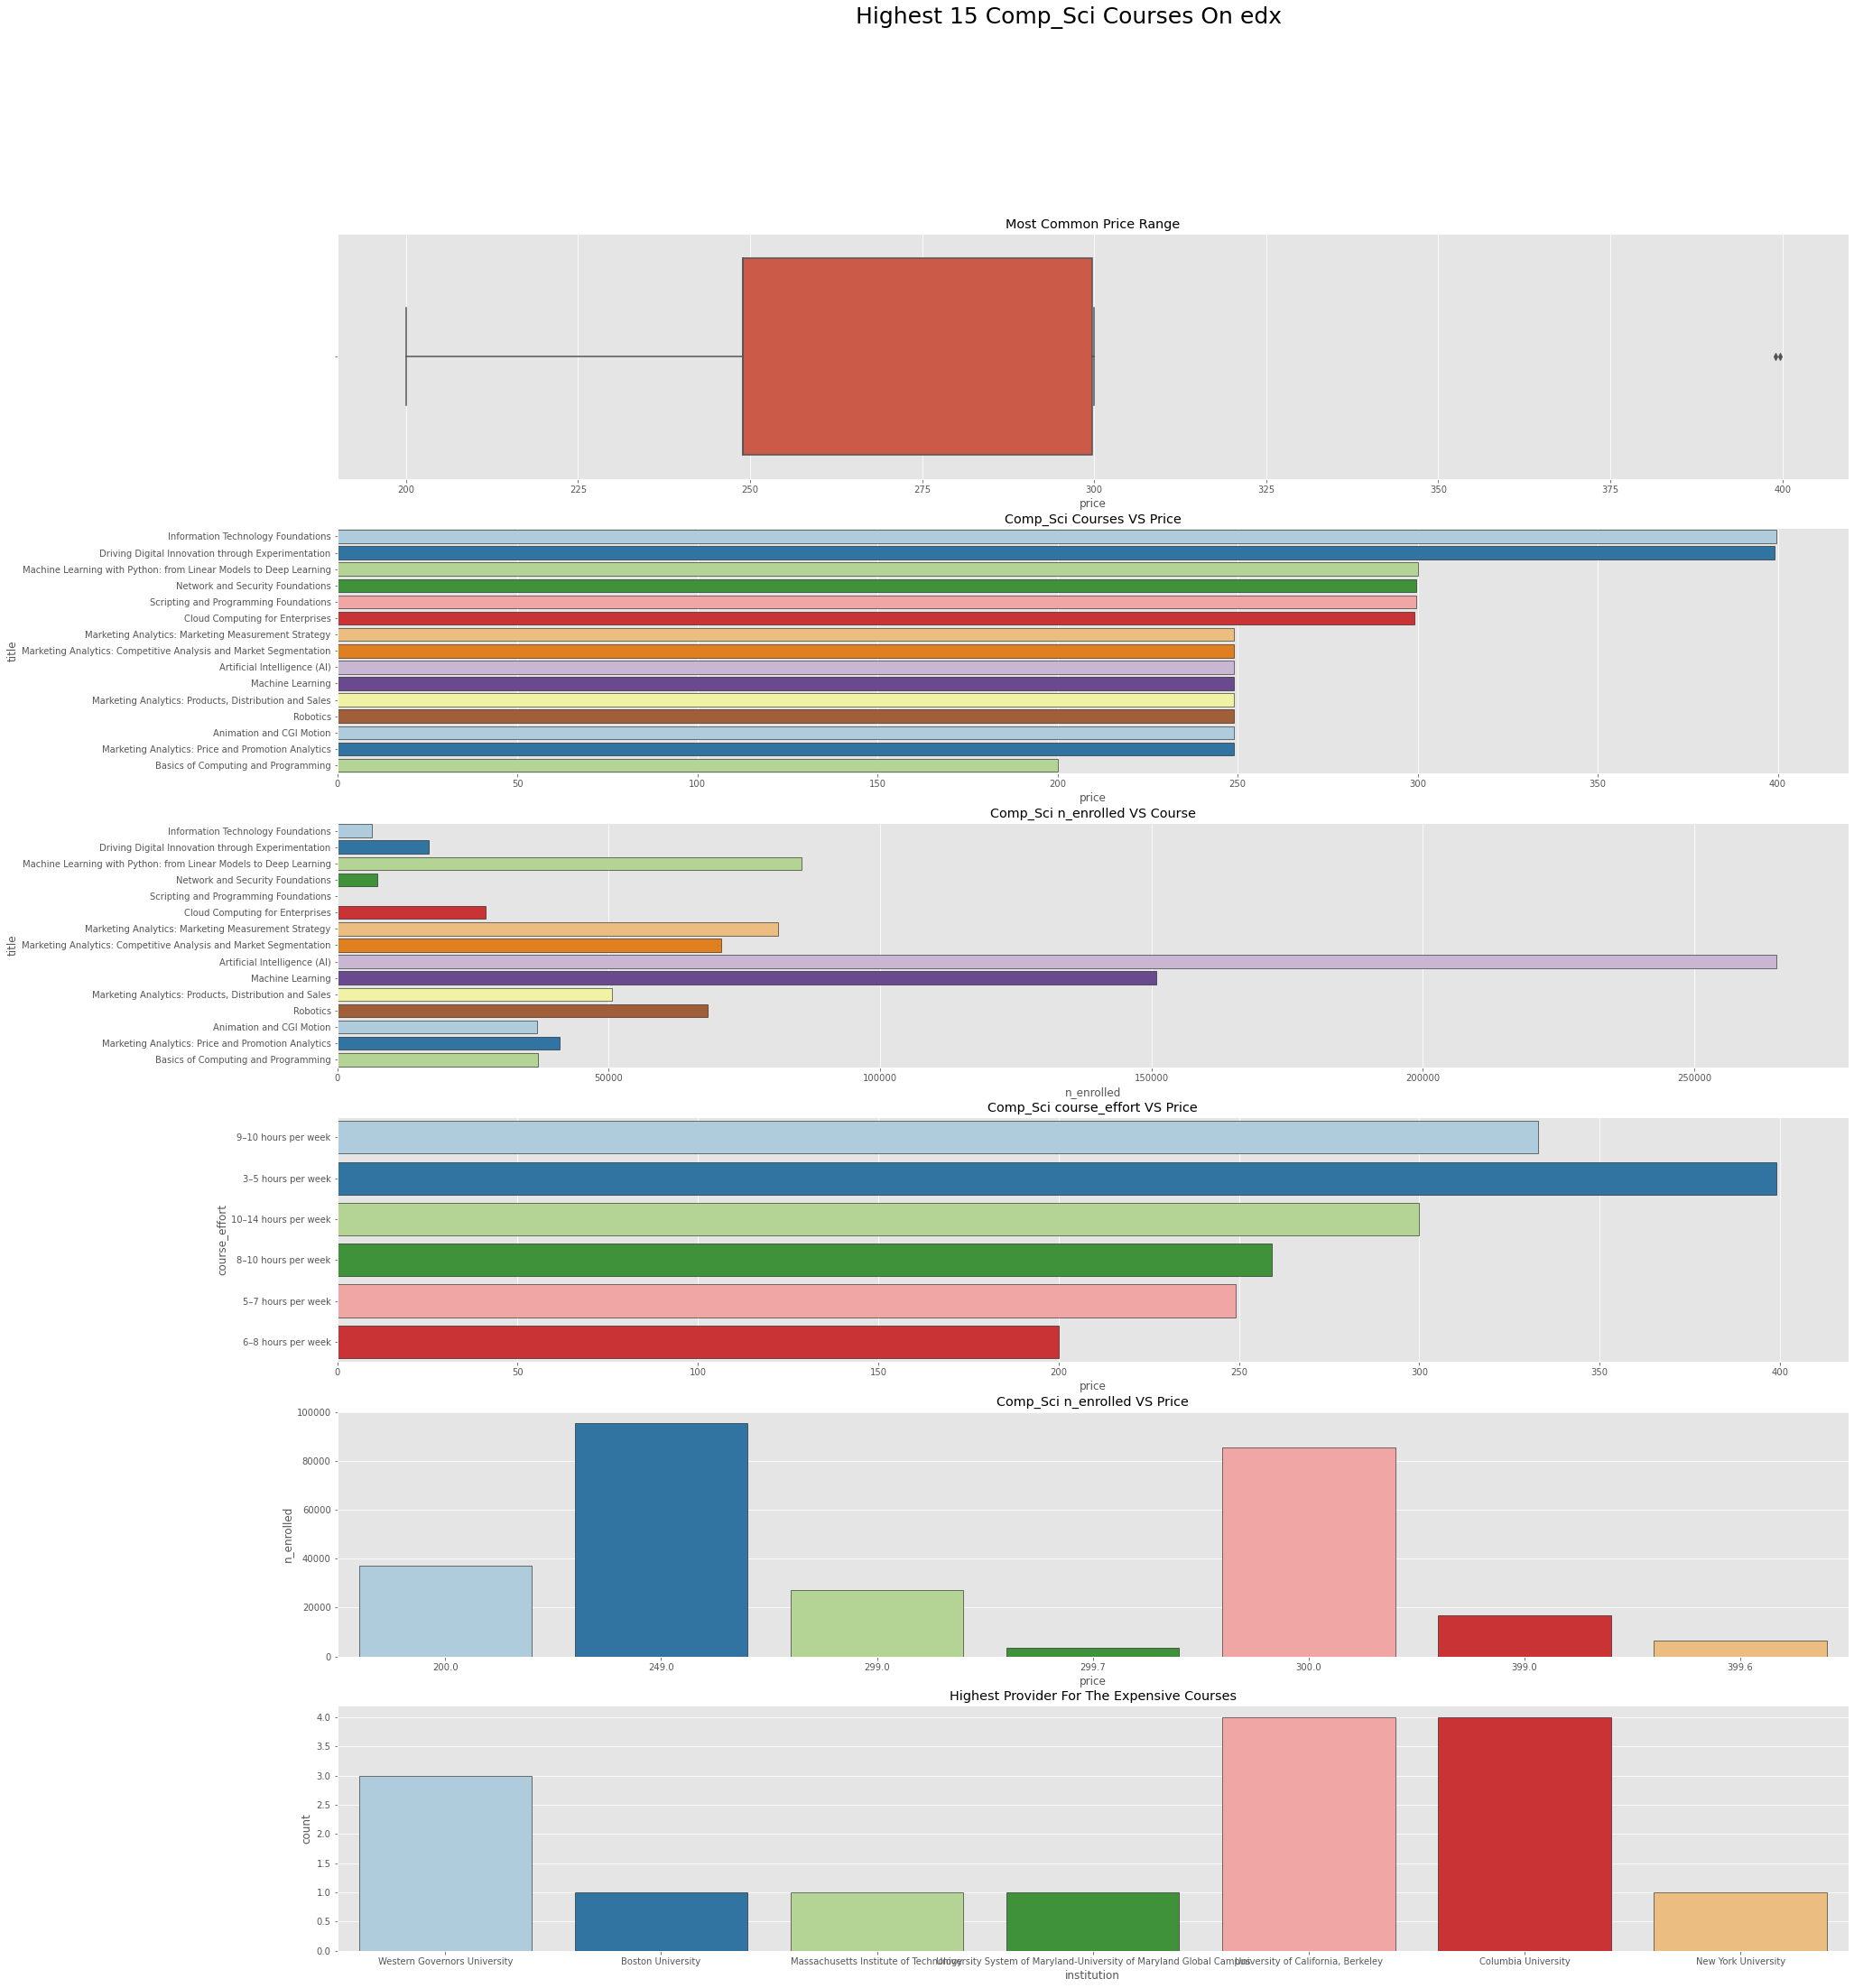

price           279.266667
n_enrolled    62990.400000
dtype: float64


In [50]:
fig, axes = plt.subplots(6,figsize=(30,35))
fig.suptitle("Highest 15 Comp_Sci Courses On edx",size=25)
#create boxplot in each subplot
sns.boxplot(comp_sci_query.price,ax=axes[0])
axes[0].set_title('Most Common Price Range')
sns.barplot(x = 'price', y = 'title', data = comp_sci_query,ci=None,palette="Paired",edgecolor = 'black', ax=axes[1])
axes[1].set_title('Comp_Sci Courses VS Price')
sns.barplot(x = 'n_enrolled', y = 'title', data = comp_sci_query,ci=None,palette="Paired",edgecolor = 'black', ax=axes[2])
axes[2].set_title('Comp_Sci n_enrolled VS Course')
sns.barplot(x = 'price', y = 'course_effort', data = comp_sci_query,palette="Paired",ci=None,edgecolor = 'black', ax=axes[3])
axes[3].set_title('Comp_Sci course_effort VS Price')
sns.barplot(x = 'price', y = 'n_enrolled', data = comp_sci_query,palette="Paired",ci=None,edgecolor = 'black', ax=axes[4])
axes[4].set_title('Comp_Sci n_enrolled VS Price')
sns.countplot(comp_sci_query['institution'],palette="Paired",edgecolor = 'black')
axes[5].set_title('Highest Provider For The Expensive Courses')

plt.show()
print(comp_sci_query.mean())

In [51]:
comp_sci_tot=pd.read_sql(''' SELECT subject , COUNT(title) AS num_corses, SUM(n_enrolled) AS tot_enrollment,
AVG(course_length) AS avg_weeks_per_course,MIN(price) AS min_price ,MAX(price) AS max_price
FROM edx_courses_db 
WHERE subject == 'Computer Science' ''' ,edx_conn)

comp_sci_tot

,subject,num_corses,tot_enrollment,avg_weeks_per_course,min_price,max_price
0,Computer Science,166,12447737,6.512048,49.0,399.6


In [52]:
comp_sci_tot_per_level=pd.read_sql(''' SELECT level,COUNT(Level) AS tot_courses , SUM(n_enrolled) AS totle_enrollment , AVG(course_length) AS avg_weeks,
MIN(price) AS min_course_purchase ,MAX(price) AS max_course_purchase,AVG(price) AS avg_prcie
FROM edx_courses_db
WHERE subject == 'Computer Science'
GROUP BY Level
  ''',edx_conn).set_index('Level')       
comp_sci_tot_per_level

,tot_courses,totle_enrollment,avg_weeks,min_course_purchase,max_course_purchase,avg_prcie
Level,,,,,,
Advanced,15,835934,8.466667,49.0,399.0,196.200000
Intermediate,51,3063214,6.411765,49.0,299.0,117.588235
Introductory,100,8548589,6.270000,49.0,399.6,118.120000


(-1.1132520007024505,
 1.1006310476524976,
 -1.1091092623301277,
 1.127632985460836)

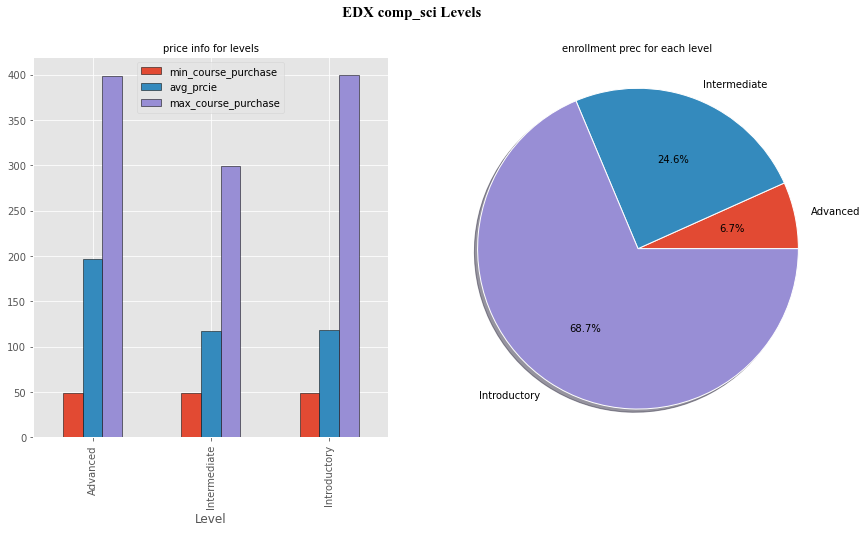

In [53]:
fig,axes=plt.subplots(1,2,figsize=(14,7))
fig.suptitle('EDX comp_sci Levels',fontweight='bold',fontname='Times New Roman',size=15)
comp_sci_tot_per_level[['min_course_purchase','avg_prcie','max_course_purchase']].plot(kind='bar',edgecolor='black',ax=axes[0])
axes[0].set_title('price info for levels',size=10)
plt.pie(comp_sci_tot_per_level['totle_enrollment'],wedgeprops={ 'linewidth' : 1, 'edgecolor' : "white" },labels=comp_sci_tot_per_level.index,shadow=True,autopct="%1.1f%%")
axes[1].set_title('enrollment prec for each level',size=10)
plt.axis('equal')

In [54]:
tot_per_level=pd.read_sql(''' SELECT level,COUNT(level) AS tot_courses , SUM(n_enrolled) AS totle_enrollment , AVG(course_length) AS avg_weeks,
MIN(price) AS min_course_purchase ,MAX(price) AS max_course_purchase,AVG(price) AS avg_prcie
FROM edx_courses_db
GROUP BY Level
  ''',edx_conn).set_index('Level')       
tot_per_level

,tot_courses,totle_enrollment,avg_weeks,min_course_purchase,max_course_purchase,avg_prcie
Level,,,,,,
Advanced,87,2999021,8.160920,25.0,450.0,185.988161
Intermediate,267,10159138,7.033708,5.0,299.0,99.606330
Introductory,621,32379441,6.360709,5.0,399.6,88.853462


(-1.117963087370225,
 1.100855385112868,
 -1.1161672605317337,
 1.1294545412117494)

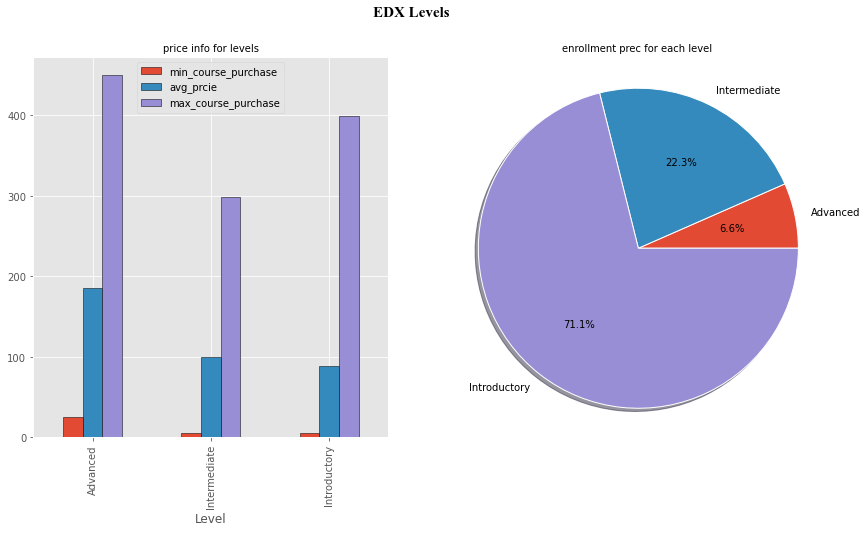

In [55]:
fig,axes=plt.subplots(1,2,figsize=(14,7))
fig.suptitle('EDX Levels',fontweight='bold',fontname='Times New Roman',size=15)
tot_per_level[['min_course_purchase','avg_prcie','max_course_purchase']].plot(kind='bar',edgecolor='black',ax=axes[0])
axes[0].set_title('price info for levels',size=10)
axes[0].legend(loc='upper center')
plt.pie(tot_per_level['totle_enrollment'],wedgeprops={ 'linewidth' : 1, 'edgecolor' : "white" },labels=tot_per_level.index,shadow=True,autopct="%1.1f%%")
axes[1].set_title('enrollment prec for each level',size=10)
plt.axis('equal')

In [56]:
edx_levels=tot_per_level.to_csv('E:/py/Data/with sql/Data/edx_levels.csv')

In [57]:
edx_courses.subject.unique()

array(['Education & Teacher Training', 'Computer Science',
       'Data Analysis & Statistics', 'Business & Management',
       'Communication', 'Health & Safety', 'Math', 'Humanities', 'Ethics',
       'Economics & Finance', 'Food & Nutrition',
       'Biology & Life Sciences', 'Social Sciences', 'Architecture',
       'Medicine', 'Environmental Studies', 'Chemistry', 'Art & Culture',
       'Language', 'Engineering', 'Philosophy & Ethics', 'Electronics',
       'History', 'Literature', 'Physics', 'Law', 'Design', 'Science',
       'Music', 'Energy & Earth Sciences', 'Philanthropy'], dtype=object)

In [58]:
business_tot = pd.read_sql(''' SELECT subject , COUNT(title) AS num_corses, SUM(n_enrolled) AS tot_enrollment,
AVG(course_length) AS avg_weeks_per_course,MIN(price) AS min_price ,MAX(price) AS max_price
FROM edx_courses_db 
WHERE subject == 'Business & Management' ''', edx_conn)
business_tot

,subject,num_corses,tot_enrollment,avg_weeks_per_course,min_price,max_price
0,Business & Management,164,7076563,6.77439,5.0,399.0


In [59]:
Law_tot = pd.read_sql(''' SELECT subject , COUNT(title) AS num_corses, SUM(n_enrolled) AS tot_enrollment,
AVG(course_length) AS avg_weeks_per_course,MIN(price) AS min_price ,MAX(price) AS max_price
FROM edx_courses_db 
WHERE subject == 'Law' ''', edx_conn)
Law_tot

,subject,num_corses,tot_enrollment,avg_weeks_per_course,min_price,max_price
0,Law,10,291436,8.1,25.0,199.0


In [60]:
Education_tot = pd.read_sql(''' SELECT subject , COUNT(title) AS num_corses, SUM(n_enrolled) AS tot_enrollment,
AVG(course_length) AS avg_weeks_per_course,MIN(price) AS min_price ,MAX(price) AS max_price
FROM edx_courses_db 
WHERE subject == 'Education & Teacher Training' ''', edx_conn)
Education_tot

,subject,num_corses,tot_enrollment,avg_weeks_per_course,min_price,max_price
0,Education & Teacher Training,29,706532,6.172414,25.0,299.0


In [61]:
Physics_tot = pd.read_sql(''' SELECT subject , COUNT(title) AS num_corses, SUM(n_enrolled) AS tot_enrollment,
AVG(course_length) AS avg_weeks_per_course,MIN(price) AS min_price ,MAX(price) AS max_price
FROM edx_courses_db 
WHERE subject == 'Physics' ''', edx_conn)
Physics_tot

,subject,num_corses,tot_enrollment,avg_weeks_per_course,min_price,max_price
0,Physics,18,580559,9.777778,49.0,169.0


In [62]:
Engineering_tot = pd.read_sql(''' SELECT subject , COUNT(title) AS num_corses, SUM(n_enrolled) AS tot_enrollment,
AVG(course_length) AS avg_weeks_per_course,MIN(price) AS min_price ,MAX(price) AS max_price
FROM edx_courses_db 
WHERE subject == 'Engineering' ''', edx_conn)
Engineering_tot

,subject,num_corses,tot_enrollment,avg_weeks_per_course,min_price,max_price
0,Engineering,58,1396839,7.344828,25.0,299.0


In [63]:
edx_tot = pd.read_sql(''' SELECT SUM(n_enrolled) AS total_edx_enrollment, COUNT(title) AS total_courses, AVG(price) AS total_avg_price
                          FROM edx_courses_db
                          ORDER BY price DESC ''', edx_conn)
edx_tot

,total_edx_enrollment,total_courses,total_avg_price
0,45537600,975,100.465497


In [71]:
subject_anal=pd.read_sql(''' SELECT subject, COUNT(title) AS num_courses,SUM(n_enrolled) AS total_enrollment,AVG(course_length) AS avg_weeks_per_course,MIN(price) AS min_price ,MAX(price) AS max_price,AVG(price)AS avg_price         
FROM edx_courses_db 
GROUP BY subject
ORDER BY total_enrollment DESC LIMIT 14''',edx_conn)
subject_anal.dtypes

subject                  object
num_courses               int64
total_enrollment          int64
avg_weeks_per_course    float64
min_price               float64
max_price               float64
avg_price               float64
dtype: object

In [72]:
by_subject_csv = subject_anal.to_csv('E:/py/Data/with sql/Data/by_subject_csv.csv')

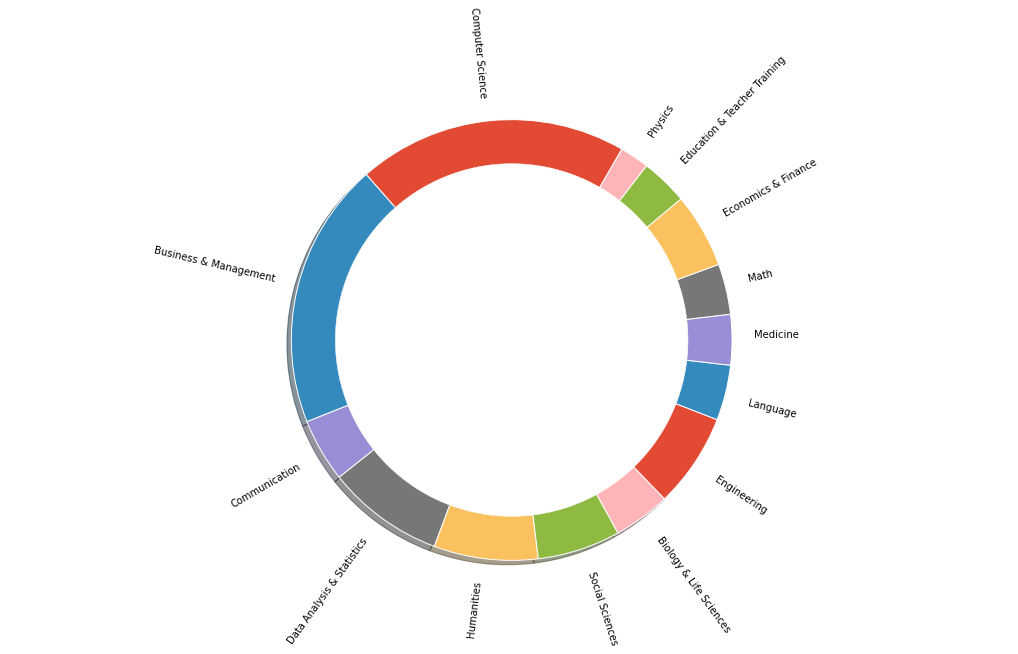

In [79]:
plt.figure(figsize=(18,9))
my_circle = plt.Circle( (0,0), 0.8, color='white')
plt.pie(subject_anal['num_courses'], labels=subject_anal.subject,shadow=True,wedgeprops={ 'linewidth' : 1, 'edgecolor' : "white" },rotatelabels =True,startangle=60)
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.axis('equal')
# Show the graph
plt.show()

In [291]:
price_anal=pd.read_sql(''' SELECT price, COUNT(price) AS num_of_courses_with_ThisPrice, 100* COUNT(price) / (SELECT COUNT(*) FROM edx_courses_db) AS price_prec             
FROM edx_courses_db 
GROUP BY price
ORDER BY price_prec DESC 
LIMIT 13''',edx_conn)
price_anal

,price,num_of_courses_with_ThisPrice,price_prec
0,49.0,270,27
1,99.0,137,14
2,50.0,96,9
3,199.0,85,8
4,149.0,78,8
5,25.0,49,5
6,150.0,30,3
7,139.0,33,3
8,249.0,26,2
9,79.0,21,2


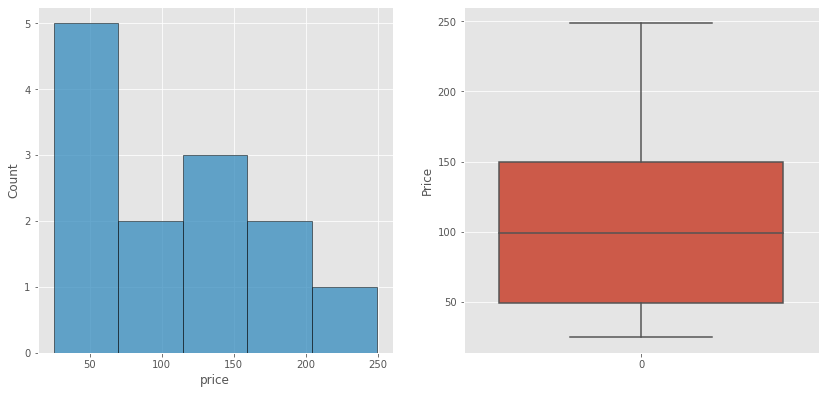

In [292]:
plt.figure(figsize=(14,14))
plt.subplot(2,2,1)
ax=sns.histplot(data = price_anal.price,edgecolor='black')
plt.subplot(2,2,2)
ax=sns.boxplot(data = price_anal.price)
ax.set_ylabel('Price')
plt.show()

In [293]:
by_price_csv = price_anal.to_csv('E:/py/Data/with sql/Data/by_price_csv.csv')

In [294]:
by_course_effort = pd.read_sql(''' SELECT course_effort, COUNT(course_effort) AS num_hours, 
                                   100 * COUNT(course_effort) / (SELECT COUNT(*) FROM edx_courses_db) AS hours_prec
                                   FROM edx_courses_db 
                                   GROUP BY course_effort
                                   ORDER BY hours_prec DESC LIMIT 10 ''', edx_conn)
by_course_effort


,course_effort,num_hours,hours_prec
0,2–4 hours per week,108,11
1,3–5 hours per week,103,10
2,2–3 hours per week,104,10
3,3–4 hours per week,91,9
4,4–6 hours per week,79,8
5,8–10 hours per week,57,5
6,6–8 hours per week,51,5
7,4–5 hours per week,55,5
8,1–2 hours per week,55,5
9,5–7 hours per week,28,2


In [295]:
by_course_effort=by_course_effort.to_csv('E:/py/Data/with sql/Data/by_course_effort_csv.csv')

In [296]:
#plt.figure(figsize=(14,7))
#sns.barplot(x = 'hours_prec', y = 'course_effort', data = by_course_effort, palette="Paired")  

In [297]:
institution_anal=pd.read_sql('''SELECT institution,COUNT(institution) AS num_courses,100* COUNT(institution) / (SELECT COUNT(*) FROM edx_courses_db) AS institution_prec 
FROM edx_courses_db
GROUP BY institution
ORDER BY institution_prec DESC
LIMIT 10''',edx_conn)
institution_anal

,institution,num_courses,institution_prec
0,Harvard University,104,10
1,Universitat Politècnica de Valencia,47,4
2,Massachusetts Institute of Technology,41,4
3,IBM,30,3
4,Delft University of Technology,30,3
5,"University of California, Berkeley",20,2
6,The University of Queensland,26,2
7,The University of Michigan,22,2
8,Tecnológico de Monterrey,21,2
9,Stanford University,20,2


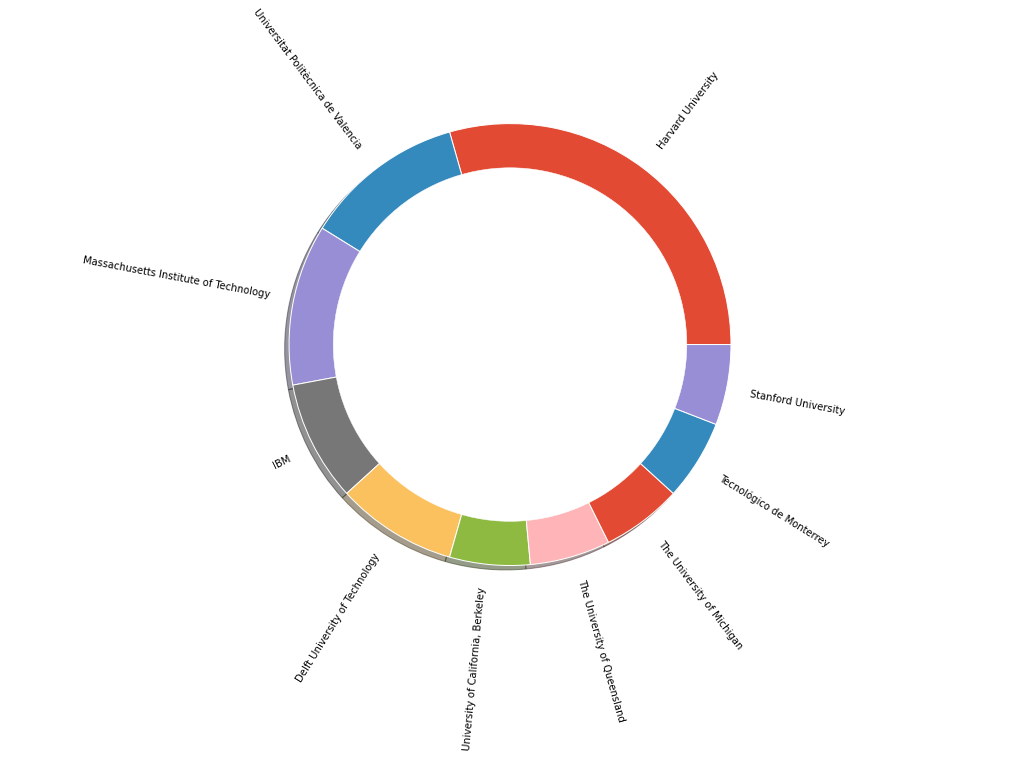

In [298]:
plt.figure(figsize=(18,9))
my_circle = plt.Circle( (0,0), 0.8, color='white')
plt.pie(institution_anal['institution_prec'], labels=institution_anal.institution,wedgeprops={ 'linewidth' : 1, 'edgecolor' : "white" },shadow=True,rotatelabels =True)
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.axis('equal')
# Show the graph
plt.show()

In [299]:
coures_type_anal=pd.read_sql('''SELECT course_type,COUNT(course_type) AS count 
FROM edx_courses_db
GROUP BY course_type
ORDER BY count DESC ''',edx_conn)
coures_type_anal

,course_type,count
0,Self-paced on your time,917
1,Instructor-led on a course schedule,58


Text(0.5, 1.0, 'edx_corses')

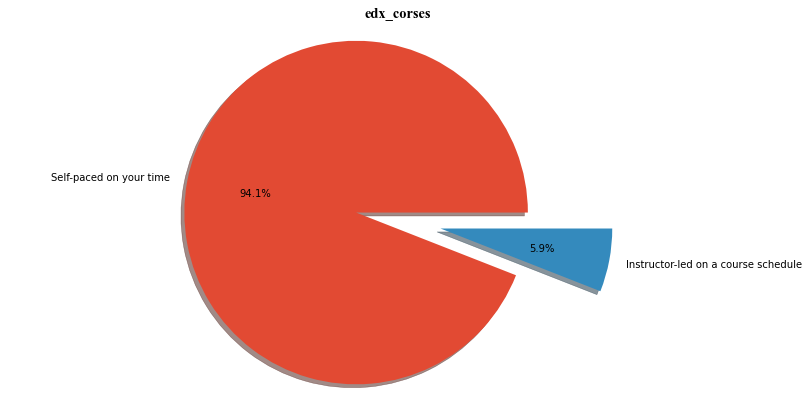

In [300]:
plt.figure(figsize=(14,7))
plt.pie(coures_type_anal['count'], labels=coures_type_anal.course_type,shadow=True,explode =(0,.5) ,autopct="%1.1f%%")
plt.axis('equal')
plt.title('edx_corses',fontweight='bold',fontname='Times New Roman')

In [301]:
subject_tot_enroll=pd.read_sql(''' SELECT subject ,SUM(n_enrolled) AS tot_enrollment,COUNT(subject) AS num_coreses
FROM edx_courses_db
GROUP BY subject
ORDER BY tot_enrollment DESC 
LIMIT 10''',edx_conn)
subject_tot_enroll

,subject,tot_enrollment,num_coreses
0,Computer Science,12447737,166
1,Business & Management,7076563,164
2,Communication,4641327,39
3,Data Analysis & Statistics,4264412,72
4,Humanities,3504140,64
5,Social Sciences,1844379,51
6,Biology & Life Sciences,1763832,35
7,Engineering,1396839,58
8,Language,1063257,34
9,Medicine,989765,31


In [302]:
subject_tot_enroll=pd.read_sql(''' SELECT subject ,AVG(n_enrolled) AS avg_enrollment,COUNT(subject) AS num_coreses
FROM edx_courses_db
GROUP BY subject
ORDER BY avg_enrollment DESC 
LIMIT 10''',edx_conn)
subject_tot_enroll

,subject,avg_enrollment,num_coreses
0,Communication,119008.384615,39
1,Architecture,91322.200000,5
2,Computer Science,74986.367470,166
3,Data Analysis & Statistics,59227.944444,72
4,Humanities,54752.187500,64
5,Biology & Life Sciences,50395.200000,35
6,Literature,47898.000000,4
7,Business & Management,43149.774390,164
8,Chemistry,39507.000000,5
9,Social Sciences,36164.294118,51


In [303]:
Udemy.published_timestamp=Udemy.published_timestamp.dt.date
Udemy.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13,Business Finance


In [304]:
Udemy.published_timestamp=pd.to_datetime(Udemy.published_timestamp)
Udemy.dtypes

course_id                       int64
course_title                   object
url                            object
is_paid                          bool
price                           int64
num_subscribers                 int64
num_reviews                     int64
num_lectures                    int64
level                        category
content_duration              float64
published_timestamp    datetime64[ns]
subject                        object
dtype: object

In [305]:
Udemy.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13,Business Finance


In [306]:
del Udemy['course_id']

In [307]:
Udemy['is_paid'] = Udemy['is_paid'].astype('category')

In [308]:
Udemy['is_paid'].value_counts()

True     3368
False     310
Name: is_paid, dtype: int64

In [309]:
Udemy.head()

,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18,Business Finance
1,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09,Business Finance
2,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19,Business Finance
3,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30,Business Finance
4,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13,Business Finance


In [310]:
Path('E:/py/Data/with sql/Data/udemy_courses_db.db').touch()
udmey_conn=sqlite3.connect('E:/py/Data/with sql/Data/udemy_courses_db.db')
udmey_cursor = udmey_conn.cursor()

In [311]:
Udemy.to_sql('udemy_courses_db',udmey_conn,if_exists='replace',index=False)

In [312]:
pd.read_sql(''' SELECT *
FROM udemy_courses_db
LIMIT 5''',udmey_conn)

,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,1,200,2147,23,51,All Levels,1.5,2017-01-18 00:00:00,Business Finance
1,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,1,75,2792,923,274,All Levels,39.0,2017-03-09 00:00:00,Business Finance
2,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,1,45,2174,74,51,Intermediate Level,2.5,2016-12-19 00:00:00,Business Finance
3,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,1,95,2451,11,36,All Levels,3.0,2017-05-30 00:00:00,Business Finance
4,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,1,200,1276,45,26,Intermediate Level,2.0,2016-12-13 00:00:00,Business Finance


In [313]:
paid_courses=pd.read_sql('''SELECT subject,COUNT(subject) AS num_courses , AVG(price) AS avg_price_for_course,SUM(num_subscribers) AS subscribers ,SUM(num_reviews) AS reviews,AVG(num_lectures) AS avg__lecturer_num              
FROM udemy_courses_db
WHERE is_paid == 1 
GROUP BY subject
ORDER BY num_courses DESC''',udmey_conn)
paid_courses

,subject,num_courses,avg_price_for_course,subscribers,reviews,avg__lecturer_num
0,Business Finance,1099,74.540491,1265483,51772,33.617834
1,Web Development,1067,86.635426,5597831,339522,56.405811
2,Musical Instruments,634,53.154574,541954,24895,39.621451
3,Graphic Design,568,61.390845,778327,26494,32.799296


In [314]:
unpaid_courses=pd.read_sql('''SELECT subject,COUNT(subject) AS num_courses , AVG(price) AS avg_price_for_course,SUM(num_subscribers) AS subscribers ,SUM(num_reviews) AS reviews,AVG(num_lectures) AS avg__lecturer_num              
FROM udemy_courses_db
WHERE is_paid == 0
GROUP BY subject
ORDER BY num_courses DESC''',udmey_conn)
unpaid_courses

,subject,num_courses,avg_price_for_course,subscribers,reviews,avg__lecturer_num
0,Web Development,133,0.0,2382741,90503,24.030075
1,Business Finance,96,0.0,603228,24130,18.843750
2,Musical Instruments,46,0.0,304735,6829,20.326087
3,Graphic Design,35,0.0,284821,10576,19.971429


In [315]:
is_paid_anal=pd.read_sql('''SELECT SUM(num_subscribers) AS subscribers,COUNT(subject)AS num_courses,AVG(price) AS avg_price_for_course
,SUM(num_reviews) AS reviews,SUM(num_lectures) AS lecturers
FROM udemy_courses_db
GROUP BY is_paid
ORDER BY num_courses DESC
''',udmey_conn)
is_paid_anal.index=['Paid','UnPaid']
is_paid_anal

,subscribers,num_courses,avg_price_for_course,reviews,lecturers
Paid,8183595,3368,72.12886,442683,140881
UnPaid,3575525,310,0.00000,132038,6639


(-1.1239728299229537,
 1.4943367333446442,
 -1.4385862932378355,
 1.1205140503377937)

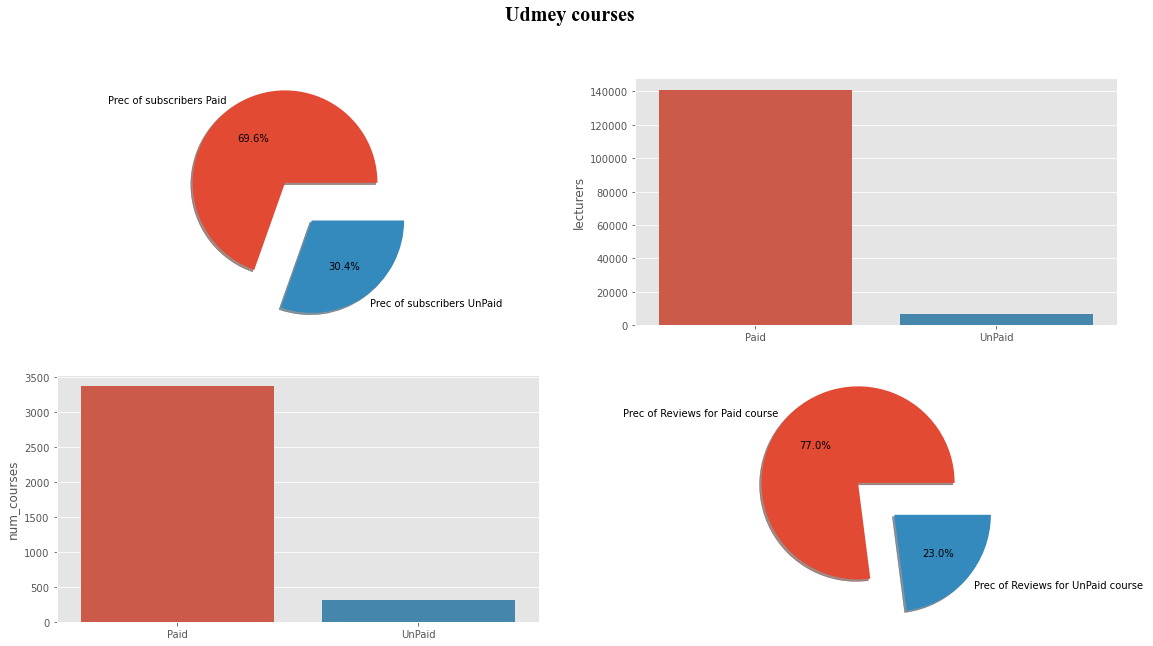

In [316]:
plt.figure(figsize=(19,10))
plt.suptitle('Udmey courses',fontweight='bold', fontname="Times New Roman",fontsize=20)
plt.subplot(2,2,1)
plt.pie(is_paid_anal['subscribers'], labels=['Prec of subscribers Paid','Prec of subscribers UnPaid'],shadow=True,explode =(0,.5) ,autopct="%1.1f%%")
plt.axis('equal')
plt.subplot(2,2,2)
sns.barplot(data=is_paid_anal,x=is_paid_anal.index,y='lecturers')
plt.subplot(2,2,3)
sns.barplot(data=is_paid_anal,x=is_paid_anal.index,y='num_courses')
plt.subplot(2,2,4)
plt.pie(is_paid_anal['reviews'], labels=['Prec of Reviews for Paid course','Prec of Reviews for UnPaid course '],shadow=True,explode =(0,.5) ,autopct="%1.1f%%")
plt.axis('equal')

In [317]:
by_subject = pd.read_sql(''' SELECT subject, COUNT(subject) AS subject_count,
                             100 * COUNT(subject) / (SELECT COUNT(*) FROM udemy_courses_db) AS subject_pct
                             FROM udemy_courses_db
                             GROUP BY subject
                             ORDER BY subject_pct DESC ''', udmey_conn)
by_subject


,subject,subject_count,subject_pct
0,Web Development,1200,32
1,Business Finance,1195,32
2,Musical Instruments,680,18
3,Graphic Design,603,16


In [318]:
by_price = pd.read_sql(''' SELECT price, COUNT(price) AS subject_count,
                             100 * COUNT(price) / (SELECT COUNT(*) FROM udemy_courses_db) AS price_pct
                             FROM udemy_courses_db
                             WHERE is_paid==1
                             GROUP BY price
                             ORDER BY price_pct DESC LIMIT 10 ''', udmey_conn)
by_price

,price,subject_count,price_pct
0,20,830,22
1,50,468,12
2,200,295,8
3,40,217,5
4,95,152,4
5,30,166,4
6,25,154,4
7,195,127,3
8,100,133,3
9,35,116,3


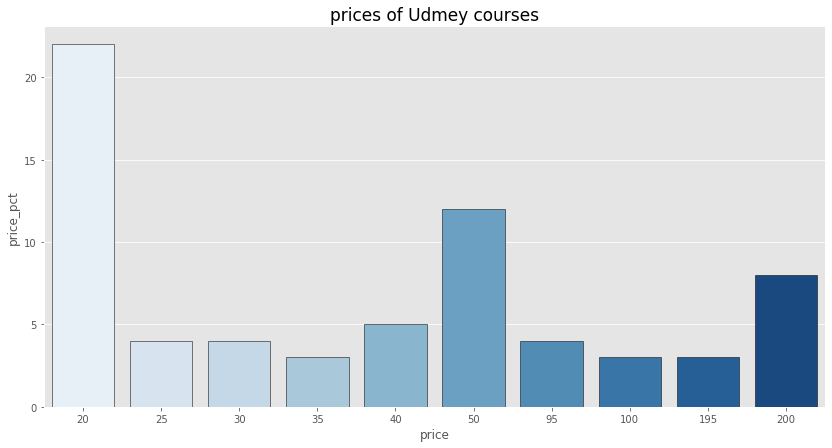

In [319]:
plt.figure(figsize=(14,7))
sns.barplot(x = 'price', y = 'price_pct', data = by_price, palette="Blues", edgecolor = 'black', ci=False)
plt.title('prices of Udmey courses',fontsize=17)
plt.show()

In [320]:
by_price['price'] = by_price['price'].astype(str)

In [321]:
udemy_by_price_csv = by_price.to_csv('E:/py/Data/with sql/Data/udemy_by_price.csv')

In [322]:
by_top_subs_subject = pd.read_sql(''' SELECT course_title, subject, num_subscribers,url FROM udemy_courses_db
                          GROUP BY subject
                          ORDER BY num_subscribers DESC ''', udmey_conn)

by_top_subs_subject

,course_title,subject,num_subscribers,url
0,Learn Web Designing & HTML5/CSS3 Essentials in...,Web Development,43285,https://www.udemy.com/build-beautiful-html5-we...
1,"7 Ways A Beginner Guitarist Can Sound Better, ...",Musical Instruments,4529,https://www.udemy.com/nationalguitaracademy/
2,Anatomy and Figure Drawing for Beginners,Graphic Design,2252,https://www.udemy.com/anatomy-and-figure-drawi...
3,Ultimate Investment Banking Course,Business Finance,2147,https://www.udemy.com/ultimate-investment-bank...


In [374]:
udemy_by_subs=pd.read_sql('''SELECT course_title,subject,num_subscribers,url
FROM udemy_courses_db
ORDER BY  num_subscribers DESC 
LIMIT 10''',udmey_conn)
udemy_by_subs

,course_title,subject,num_subscribers,url
0,Learn HTML5 Programming From Scratch,Web Development,268923,https://www.udemy.com/learn-html5-programming-...
1,Coding for Entrepreneurs Basic,Web Development,161029,https://www.udemy.com/coding-for-entrepreneurs...
2,The Web Developer Bootcamp,Web Development,121584,https://www.udemy.com/the-web-developer-bootcamp/
3,Build Your First Website in 1 Week with HTML5 ...,Web Development,120291,https://www.udemy.com/build-your-first-website...
4,The Complete Web Developer Course 2.0,Web Development,114512,https://www.udemy.com/the-complete-web-develop...
5,Free Beginner Electric Guitar Lessons,Musical Instruments,101154,https://www.udemy.com/beginner-electric-guitar...
6,Web Design for Web Developers: Build Beautiful...,Web Development,98867,https://www.udemy.com/web-design-secrets/
7,Learn Javascript & JQuery From Scratch,Web Development,84897,https://www.udemy.com/learn-javascript-jquery-...
8,Practical PHP: Master the Basics and Code Dyna...,Web Development,83737,https://www.udemy.com/code-dynamic-websites/
9,JavaScript: Understanding the Weird Parts,Web Development,79612,https://www.udemy.com/understand-javascript/


Text(0.5, 1.0, 'Most subscribered courses')

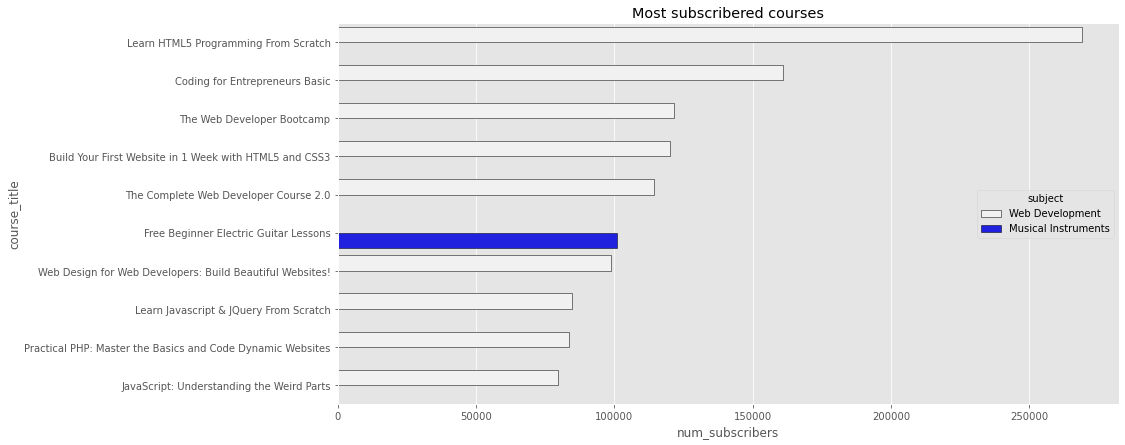

In [348]:
plt.figure(figsize=(14,7))
ax=sns.barplot(x = 'num_subscribers', y = 'course_title', hue = 'subject', data = udemy_by_subs, color = 'blue', edgecolor='black', ci=False)
ax.legend(title="subject" ,loc='center right')
plt.title('Most subscribered courses')

In [339]:
udemy_by_subs_csv = udemy_by_subs.to_csv('E:/py/Data/with sql/Data/udemy_by_subs.csv')

In [344]:
udemy_by_reviews=pd.read_sql('''SELECT course_title,subject,num_reviews,url
FROM udemy_courses_db
ORDER BY  num_reviews DESC 
LIMIT 10''',udmey_conn)
udemy_by_reviews

,course_title,subject,num_reviews,url
0,The Web Developer Bootcamp,Web Development,27445,https://www.udemy.com/the-web-developer-bootcamp/
1,The Complete Web Developer Course 2.0,Web Development,22412,https://www.udemy.com/the-complete-web-develop...
2,Angular 4 (formerly Angular 2) - The Complete ...,Web Development,19649,https://www.udemy.com/the-complete-guide-to-an...
3,JavaScript: Understanding the Weird Parts,Web Development,16976,https://www.udemy.com/understand-javascript/
4,Modern React with Redux,Web Development,15117,https://www.udemy.com/react-redux/
5,Learn and Understand AngularJS,Web Development,11580,https://www.udemy.com/learn-angularjs/
6,Learn and Understand NodeJS,Web Development,11123,https://www.udemy.com/understand-nodejs/
7,Learn HTML5 Programming From Scratch,Web Development,8629,https://www.udemy.com/learn-html5-programming-...
8,Angular 2 with TypeScript for Beginners: The P...,Web Development,8341,https://www.udemy.com/angular-2-tutorial-for-b...
9,Pianoforall - Incredible New Way To Learn Pian...,Musical Instruments,7676,https://www.udemy.com/pianoforall-incredible-n...


Text(0.5, 1.0, 'Most reviewd courses')

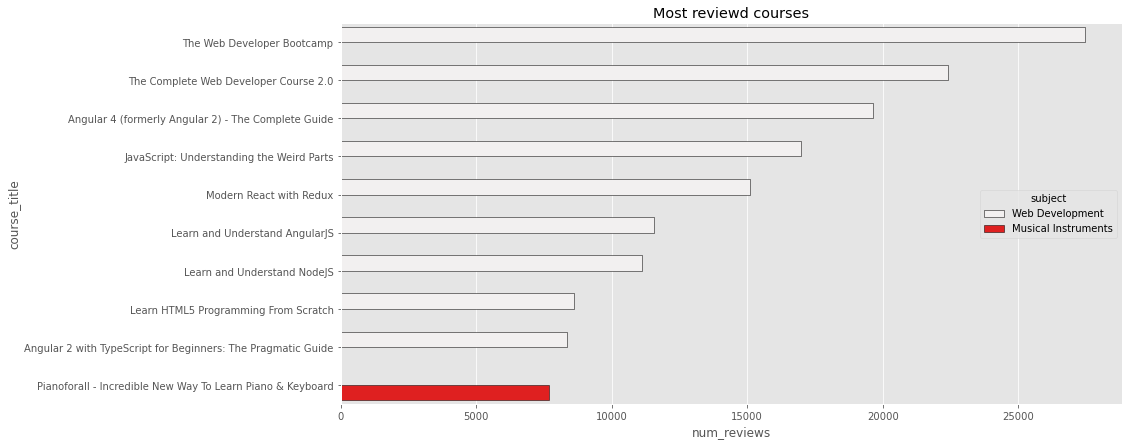

In [349]:
plt.figure(figsize=(14,7))
ax=sns.barplot(x = 'num_reviews', y = 'course_title', hue = 'subject', data = udemy_by_reviews, color = 'red', edgecolor='black', ci=False)
ax.legend(title="subject" ,loc='center right')
plt.title('Most reviewd courses')

In [356]:
reviews_lec = pd.read_sql(''' SELECT course_title, subject, num_lectures, num_reviews
                             FROM udemy_courses_db
                             ORDER BY num_reviews DESC''', udmey_conn)
reviews_lec

,course_title,subject,num_lectures,num_reviews
0,The Web Developer Bootcamp,Web Development,342,27445
1,The Complete Web Developer Course 2.0,Web Development,304,22412
2,Angular 4 (formerly Angular 2) - The Complete ...,Web Development,329,19649
3,JavaScript: Understanding the Weird Parts,Web Development,85,16976
4,Modern React with Redux,Web Development,150,15117
...,...,...,...,...
3673,Effective Personal Website Building and Hosting,Web Development,11,0
3674,Angular 4 Front To Back,Web Development,68,0
3675,XSD :basics for beginners,Web Development,7,0
3676,AppML :basics for beginners,Web Development,8,0


Text(0.5, 1.0, 'num_lectures Vs num_reviews')

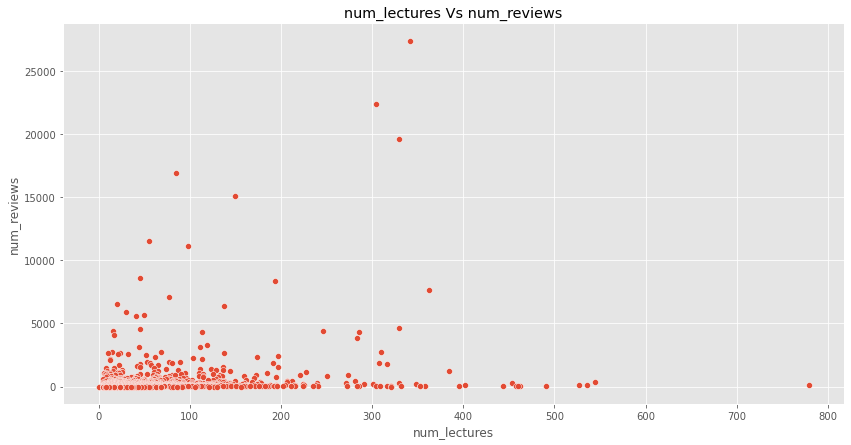

In [386]:
plt.figure(figsize=(14,7))
sns.scatterplot(data=reviews_lec,x='num_lectures',y='num_reviews')
plt.title('num_lectures Vs num_reviews')

In [375]:
reviews_duration = pd.read_sql(''' SELECT course_title, subject, num_lectures, num_reviews, content_duration, price,
                             (price/content_duration) AS hourly_price
                             FROM udemy_courses_db
                             WHERE is_paid == 1
                             ORDER BY num_reviews DESC''', udmey_conn)
reviews_duration

,course_title,subject,num_lectures,num_reviews,content_duration,price,hourly_price
0,The Web Developer Bootcamp,Web Development,342,27445,43.000000,200,4.651163
1,The Complete Web Developer Course 2.0,Web Development,304,22412,30.500000,200,6.557377
2,Angular 4 (formerly Angular 2) - The Complete ...,Web Development,329,19649,22.000000,190,8.636364
3,JavaScript: Understanding the Weird Parts,Web Development,85,16976,11.500000,175,15.217391
4,Modern React with Redux,Web Development,150,15117,26.500000,180,6.792453
...,...,...,...,...,...,...,...
3363,Effective Personal Website Building and Hosting,Web Development,11,0,1.000000,20,20.000000
3364,Angular 4 Front To Back,Web Development,68,0,8.500000,40,4.705882
3365,XSD :basics for beginners,Web Development,7,0,0.700000,35,50.000000
3366,AppML :basics for beginners,Web Development,8,0,0.633333,30,47.368421


In [376]:
reviews_duration.hourly_price.min()

0.2857142857142857

Text(0.5, 1.0, 'content_duration & price')

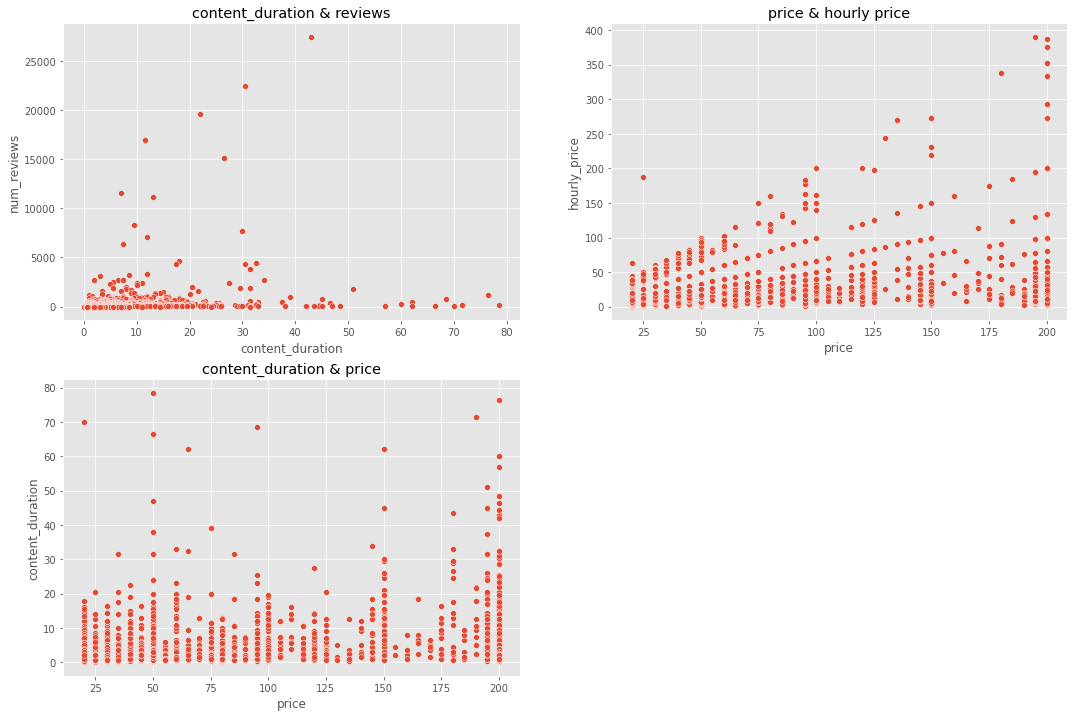

In [394]:
plt.figure(figsize=(18,12))
plt.subplot(2,2,1)
sns.scatterplot(data=reviews_duration,x='content_duration',y='num_reviews')
plt.title('content_duration & reviews')
plt.subplot(2,2,2)
sns.scatterplot(data=reviews_duration,y='hourly_price',x='price')
plt.title('price & hourly price')
plt.subplot(2,2,3)
sns.scatterplot(data=reviews_duration,y='content_duration',x='price')
plt.title('content_duration & price')

In [395]:
reviews_duration_csv = reviews_duration.to_csv('E:/py/Data/with sql/Data/udemy_reviews_duration.csv')

In [396]:
tot_price = pd.read_sql(''' SELECT subject, num_subscribers, SUM(num_subscribers) AS sum_sub, AVG(price) AS avg_course_price, SUM(price) AS total_revenue
                                           FROM udemy_courses_db
                                           GROUP BY subject
                                           ORDER BY sum_sub DESC ''', udmey_conn)
tot_price

,subject,num_subscribers,sum_sub,avg_course_price,total_revenue
0,Web Development,43285,7980572,77.033333,92440
1,Business Finance,2147,1868711,68.552301,81920
2,Graphic Design,2252,1063148,57.827529,34870
3,Musical Instruments,4529,846689,49.558824,33700


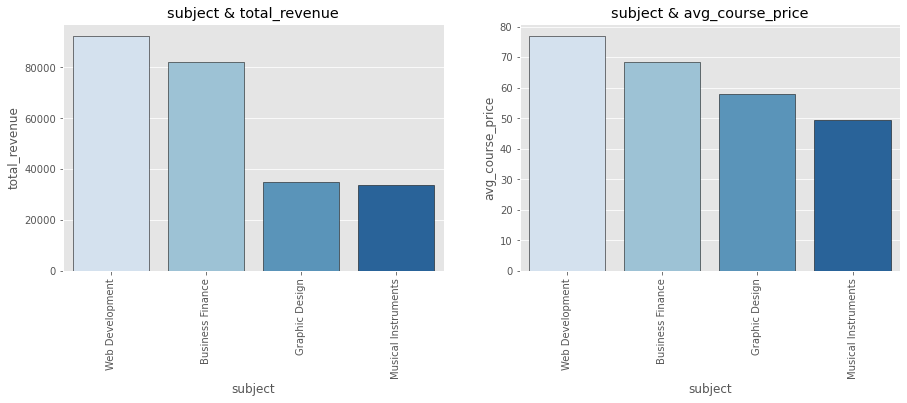

In [460]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.barplot(x = 'subject', y = 'total_revenue', data = tot_price, palette="Blues", edgecolor = 'black', ci = False)
plt.xticks(rotation=90)
plt.title('subject & total_revenue')
plt.subplot(2,2,2)
sns.barplot(x = 'subject', y = 'avg_course_price', data = tot_price, palette="Blues", edgecolor = 'black', ci = False)
plt.title('subject & avg_course_price')
plt.xticks(rotation=90)
plt.show()

In [437]:
x=pd.read_sql(''' SELECT * 
FROM udemy_courses_db''',udmey_conn)
x.columns

Index(['course_title', 'url', 'is_paid', 'price', 'num_subscribers',
       'num_reviews', 'num_lectures', 'level', 'content_duration',
       'published_timestamp', 'subject'],
      dtype='object')

In [450]:
udemy_per_level=pd.read_sql(''' SELECT level,COUNT(level) AS tot_courses , SUM(num_subscribers) AS totle_sups , AVG(content_duration) AS avg_content_duration,
SUM(num_reviews) AS totle_reviews,MIN(price) AS min_course_purchase ,MAX(price) AS max_course_purchase,AVG(price) AS avg_prcie
FROM udemy_courses_db
WHERE is_paid == 1
GROUP BY level
  ''',udmey_conn).set_index('level')       
udemy_per_level

,tot_courses,totle_sups,avg_content_duration,totle_reviews,min_course_purchase,max_course_purchase,avg_prcie
level,,,,,,,
All Levels,1807,5286210,5.008329,343707,20,200,77.952407
Beginner Level,1112,2309512,3.266007,64328,20,200,63.592626
Expert Level,58,50196,2.905460,2333,20,200,91.120690
Intermediate Level,391,537677,3.897528,32315,20,200,66.675192


(-1.1123992185079161,
 1.1005904389765675,
 -1.1097326095132416,
 1.1079054368021604)

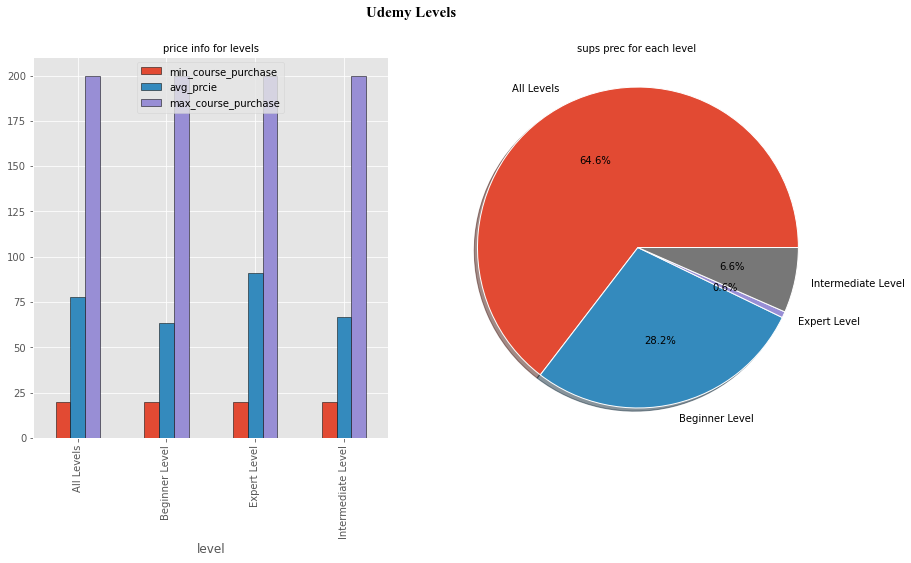

In [501]:
fig,axes=plt.subplots(1,2,figsize=(14,7))
fig.suptitle('Udemy Levels',fontweight='bold',fontname='Times New Roman',size=15)
udemy_per_level[['min_course_purchase','avg_prcie','max_course_purchase']].plot(kind='bar',edgecolor='black',ax=axes[0])
axes[0].set_title('price info for levels',size=10)
axes[0].legend(loc='upper center')
plt.pie(udemy_per_level['totle_sups'],wedgeprops={ 'linewidth' : 1, 'edgecolor' : "white" },labels=udemy_per_level.index,shadow=True,autopct="%1.1f%%")
axes[1].set_title('sups prec for each level',size=10)
plt.axis('equal')

In [406]:
udemy_tot_price = tot_price.to_csv('E:/py/Data/with sql/Data/udemy_avg_price.csv')

In [503]:
Udemy_level=udemy_per_level.to_csv('E:/py/Data/with sql/Data/Udemy_level.csv')